In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

# Load Data


In [ ]:
from google.colab import files
files.upload()

Saving career_change_prediction_dataset_dirty_missing.csv to career_change_prediction_dataset_dirty_missing.csv


{'career_change_prediction_dataset_dirty_missing.csv': b"Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation\r\nMedicine,Business Analyst,48,Male,7,High School,High,7.0,10,83,198266.0,8,No,8,High,No,No,No,Yes,2,0,1,No\r\nEducation,Economist,44,Male,26,Master's,Low,10.0,3,55,96803.0,9,No,3,Medium,No,No,Yes,Yes,2,1,9,No\r\nEducation,Biologist,21,Female,27,Master's,Low,8.0,3,78,65920.0,4,No,4,Low,No,No,No,No,2,1,2,No\r\nEducation,Business Analyst,33,Male,14,PhD,Medium,7.0,9,62,85591.0,5,No,2,Medium,Yes,No,No,No,9,0,1,No\r\nArts,Doctor,28,Female,0,PhD,Low,3.0,1,8,43986.0,3,No,5,Low,No,No,Yes,No,2,0,7,Yes\r\nMedicine,Lawyer,56,Male,39,Bachelor's,Low,3.0

In [ ]:
# Read 'None' as a value instead of missing value
custom_na_filter = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null']

df = pd.read_csv('career_change_prediction_dataset_dirty_missing.csv', keep_default_na=False, na_values=custom_na_filter )

Below are the description for each of the columns.

| Columns                     | Type                             | Description                                                                               | Example Values                                                                        |
| --------------------------- | -------------------------------- | ----------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| Field of Study              | Categorical (String)             | The area of academic focus during the individual’s education.                             | "Computer Science", "Mechanical Engineering", "Psychology", "Business", etc.          |
| Current Occupation          | Categorical (String)             | The individual's current job or industry they are employed in.                            | "Software Developer", "Mechanical Engineer", "Psychologist", "Business Analyst", etc. |
| Age                         | Integer (Discrete)               | The age of the individual.                                                                | 25, 30, 45, etc.                                                                      |
| Gender                      | Categorical (String)             | The gender of the individual.                                                             | "Male", "Female".                                                                     |
| Years of Experience         | Integer (Discrete)               | The number of years the individual has been in the workforce.                             | 1, 5, 10, etc.                                                                        |
| Education Level             | Categorical, Ordinal (String)    | The highest level of education completed by the individual.                               | "High School", "Bachelor's", "Master's", "PhD".                                       |
| Industry Growth Rate        | Categorical, Ordinal (String)    | The growth rate of the industry the individual works in.                                  | "High", "Medium", "Low".                                                              |
| Job Satisfaction            | Integer (Discrete, 1 - 10 scale) | A rating of the individual’s job satisfaction.                                            | 3, 7, 9, etc.                                                                         |
| Work-Life Balance           | Integer (Discrete, 1 - 10 scale) | A rating of the individual's perceived work-life balance.                                 | 5, 6, 8, etc.                                                                         |
| Job Opportunities           | Integer (Discrete)               | The number of available job opportunities in the individual’s field.                      | 12, 50, 150, etc.                                                                     |
| Salary                      | Integer (Continuous)             | The annual salary of the individual (in USD or local currency equivalent)                 | 45000, 85000, 120000, etc.                                                            |
| Job Security                | Integer (Discrete, 1 - 10 scale) | A rating of the individual’s perceived job security.                                      | 2, 6, 10, etc.                                                                        |
| Career Change Interest      | Categorical (String)             | Whether the individual is interested in changing their occupation.                        | “Yes”, “No”.                                                                          |
| Skills Gap                  | Integer (Discrete, 1 - 10 scale) | A measure of how well the individual’s current skills match their job requirements.       | 2, 5, 8, etc.                                                                         |
| Family Influence            | Categorical, Ordinal (String)    | The degree of influence the individual’s family has on their career choice.               | "None", "Low", "Medium", "High".                                                      |
| Mentorship Available        | Categorical (String)             | Whether the individual has access to a mentor in their current job.                       | “Yes”, “No”.                                                                          |
| Certifications              | Categorical (String)             | Whether the individual holds any certifications relevant to their occupation.             | “Yes”, “No”.                                                                          |
| Freelancing Experience      | Categorical (String)             | Whether the individual has freelanced in the past.                                        | “Yes”, “No”.                                                                          |
| Geographic Mobility         | Categorical (String)             | Whether the individual is willing to relocate for a job.                                  | “Yes”, “No”.                                                                          |
| Professional Networks       | Integer (Discrete, 1 - 10 scale) | A measure of how strong the individual's professional network is.                         | 3, 7, 9, etc.                                                                         |
| Career Change Events        | Integer (Discrete)               | The number of career changes the individual has made in the past.                         | 0, 1, 2, etc.                                                                         |
| Technology Adoption         | Integer (Discrete, 1 - 10 scale) | A measure of the individual’s comfort level with adopting new technologies.               | 4, 6, 10, etc.                                                                        |
| Likely to Change Occupation | Categorical (String)             | The target variable indicates whether an individual is likely to change their occupation. | “Yes”, “No”.                                                                          |

# Format Column Names

Converting the column names with capitalization and spaces into standardized machine-friendly format (snake_case) to ensure code compatibility, consistency, and efficiency.

In [ ]:
print(df.columns)
# reaplce column names with spaces and hyphen to underscores
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
# convert column name to lower case
df.columns = df.columns.str.lower()
print(df.columns)

Index(['Field of Study', 'Current Occupation', 'Age', 'Gender',
       'Years of Experience', 'Education Level', 'Industry Growth Rate',
       'Job Satisfaction', 'Work-Life Balance', 'Job Opportunities', 'Salary',
       'Job Security', 'Career Change Interest', 'Skills Gap',
       'Family Influence', 'Mentorship Available', 'Certifications',
       'Freelancing Experience', 'Geographic Mobility',
       'Professional Networks', 'Career Change Events', 'Technology Adoption',
       'Likely to Change Occupation'],
      dtype='object')
Index(['field_of_study', 'current_occupation', 'age', 'gender',
       'years_of_experience', 'education_level', 'industry_growth_rate',
       'job_satisfaction', 'work_life_balance', 'job_opportunities', 'salary',
       'job_security', 'career_change_interest', 'skills_gap',
       'family_influence', 'mentorship_available', 'certifications',
       'freelancing_experience', 'geographic_mobility',
       'professional_networks', 'career_change_event

# EDA

Show a few rows of records from the dataset.

In [ ]:
df.head()

field_of_study current_occupation  age  gender  years_of_experience  \
0       Medicine   Business Analyst   48    Male                    7   
1      Education          Economist   44    Male                   26   
2      Education          Biologist   21  Female                   27   
3      Education   Business Analyst   33    Male                   14   
4           Arts             Doctor   28  Female                    0   

  education_level industry_growth_rate  job_satisfaction  work_life_balance  \
0     High School                 High               7.0                 10   
1        Master's                  Low              10.0                  3   
2        Master's                  Low               8.0                  3   
3             PhD               Medium               7.0                  9   
4             PhD                  Low               3.0                  1   

   job_opportunities  ...  skills_gap  family_influence mentorship_available  \
0                 83  ...           8              High                   No   
1                 55  ...           3            Medium                   No   
2                 78  ...           4               Low                   No   
3                 62  ...           2            Medium                  Yes   
4                  8  ...           5               Low                   No   

   certifications freelancing_experience geographic_mobility  \
0              No                     No                 Yes   
1              No                    Yes                 Yes   
2              No                     No                  No   
3              No                     No                  No   
4              No                    Yes                  No   

  professional_networks career_change_events technology_adoption  \
0                     2                    0                   1   
1                     2                    1                   9   
2                     2                    1                   2   
3                     9                    0                   1   
4                     2                    0                   7   

   likely_to_change_occupation  
0                           No  
1                           No  
2                           No  
3                           No  
4                          Yes  

[5 rows x 23 columns]

A summary on the columns of the dataset, including the data types of each column, non-null values count, and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   field_of_study               38444 non-null  object 
 1   current_occupation           38444 non-null  object 
 2   age                          38444 non-null  int64  
 3   gender                       38444 non-null  object 
 4   years_of_experience          38444 non-null  int64  
 5   education_level              38444 non-null  object 
 6   industry_growth_rate         38444 non-null  object 
 7   job_satisfaction             37719 non-null  float64
 8   work_life_balance            38444 non-null  int64  
 9   job_opportunities            38444 non-null  int64  
 10  salary                       38079 non-null  float64
 11  job_security                 38444 non-null  int64  
 12  career_change_interest       38444 non-null  object 
 13  skills_gap      

## Define Categorical and Numerical Columns

In [ ]:
categorical_columns = ['field_of_study', 'current_occupation', 'gender', 'education_level', 'industry_growth_rate',
       'career_change_interest', 'family_influence', 'mentorship_available', 'certifications',
       'freelancing_experience', 'geographic_mobility', 'likely_to_change_occupation']

numerical_columns = ['age', 'years_of_experience', 'job_satisfaction', 'work_life_balance',
       'job_opportunities', 'salary', 'job_security', 'skills_gap',
       'professional_networks', 'career_change_events', 'technology_adoption']


## Statistics

Descriptive Statistics for numerical columns.


In [ ]:
df[numerical_columns].describe().T

count           mean           std      min      25%  \
age                    38444.0      39.540422     11.574509     20.0     30.0   
years_of_experience    38444.0      19.548200     11.552474      0.0     10.0   
job_satisfaction       37719.0       5.491397      2.869499      1.0      3.0   
work_life_balance      38444.0       5.517012      2.879007      1.0      3.0   
job_opportunities      38444.0      50.308267     28.877294      1.0     25.0   
salary                 38079.0  114940.102944  48946.685168  30005.0  72668.0   
job_security           38444.0       5.481896      2.870640      1.0      3.0   
skills_gap             38444.0       5.520133      2.870065      1.0      3.0   
professional_networks  38444.0       5.514098      2.868188      1.0      3.0   
career_change_events   38444.0       1.003304      0.815953      0.0      0.0   
technology_adoption    38444.0       5.487904      2.857247      1.0      3.0   

                            50%       75%       max  
age                        40.0      50.0      59.0  
years_of_experience        20.0      30.0      39.0  
job_satisfaction            6.0       8.0      10.0  
work_life_balance           6.0       8.0      10.0  
job_opportunities          50.0      75.0     100.0  
salary                 114781.0  157167.5  199996.0  
job_security                5.0       8.0      10.0  
skills_gap                  6.0       8.0      10.0  
professional_networks       6.0       8.0      10.0  
career_change_events        1.0       2.0       2.0  
technology_adoption         5.0       8.0      10.0

Descriptive statistics for categorical columns.

In [ ]:
df[categorical_columns].astype(object).describe().T

count unique                 top   freq
field_of_study               38444     10            Medicine   3949
current_occupation           38444     10  Software Developer   3892
gender                       38444      2              Female  19299
education_level              38444      4                 PhD   9777
industry_growth_rate         38444      3                High  12968
career_change_interest       38444      2                  No  30759
family_influence             38396      4                High   9624
mentorship_available         38444      2                  No  26913
certifications               38444      2                  No  26964
freelancing_experience       38444      2                  No  32708
geographic_mobility          38444      2                  No  26758
likely_to_change_occupation  38444      2                 Yes  22165

The unique values of each categorical column.

In [ ]:
for col in categorical_columns:
    print(col, df[col].unique())

field_of_study ['Medicine' 'Education' 'Arts' 'Computer Science' 'Business'
 'Mechanical Engineering' 'Biology' 'Law' 'Economics' 'Psychology']
current_occupation ['Business Analyst' 'Economist' 'Biologist' 'Doctor' 'Lawyer'
 'Software Developer' 'Artist' 'Psychologist' 'Teacher'
 'Mechanical Engineer']
gender ['Male' 'Female']
education_level ['High School' "Master's" 'PhD' "Bachelor's"]
industry_growth_rate ['High' 'Low' 'Medium']
career_change_interest ['No' 'Yes']
family_influence ['High' 'Medium' 'Low' 'None' nan]
mentorship_available ['No' 'Yes']
certifications ['No' 'Yes']
freelancing_experience ['No' 'Yes']
geographic_mobility ['Yes' 'No']
likely_to_change_occupation ['No' 'Yes']


## Check for Missing Data and Duplicate Data

Missing data found in job_satisfaction, salary, and family_influence columns.

In [ ]:
df.isnull().sum()

field_of_study                   0
current_occupation               0
age                              0
gender                           0
years_of_experience              0
education_level                  0
industry_growth_rate             0
job_satisfaction               725
work_life_balance                0
job_opportunities                0
salary                         365
job_security                     0
career_change_interest           0
skills_gap                       0
family_influence                48
mentorship_available             0
certifications                   0
freelancing_experience           0
geographic_mobility              0
professional_networks            0
career_change_events             0
technology_adoption              0
likely_to_change_occupation      0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

## Numerical EDA


### Histogram with KDE for Continuous Data

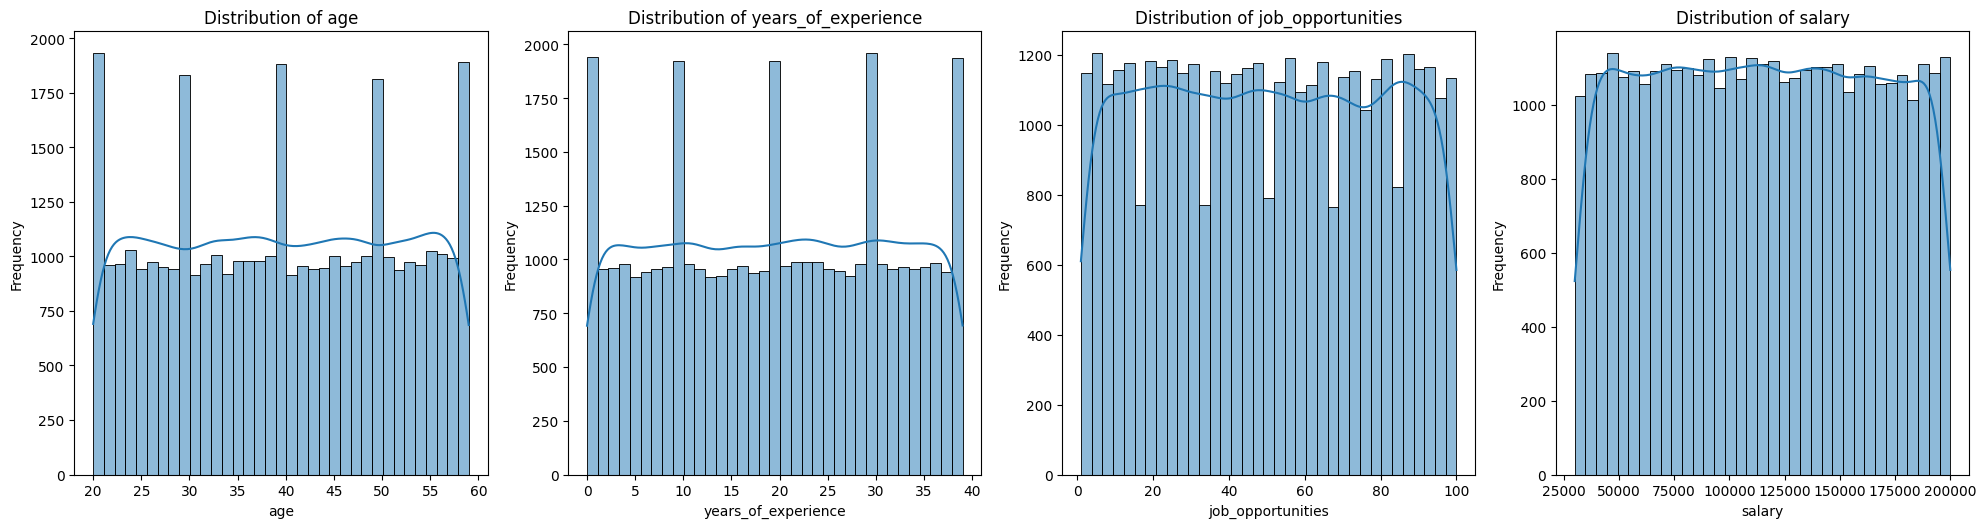

In [ ]:
continuous_columns = ['age', 'years_of_experience', 'job_opportunities', 'salary']

# Distribution plots for numerical features (continuous)
plt.figure(figsize=(20,20))
num_plots_per_side = math.ceil(math.sqrt(len(numerical_columns)))
for i, col in enumerate(continuous_columns):
    if col == 'salary':
        bins = 35
    elif col == 'age':
        bins = 40
    elif col == 'years_of_experience':
        bins = 40
    elif col == 'job_opportunities':
        bins = 10

    plt.subplot(num_plots_per_side, num_plots_per_side, i+1)
    sns.histplot(df[col], bins=35, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Countplot for Discrete Data

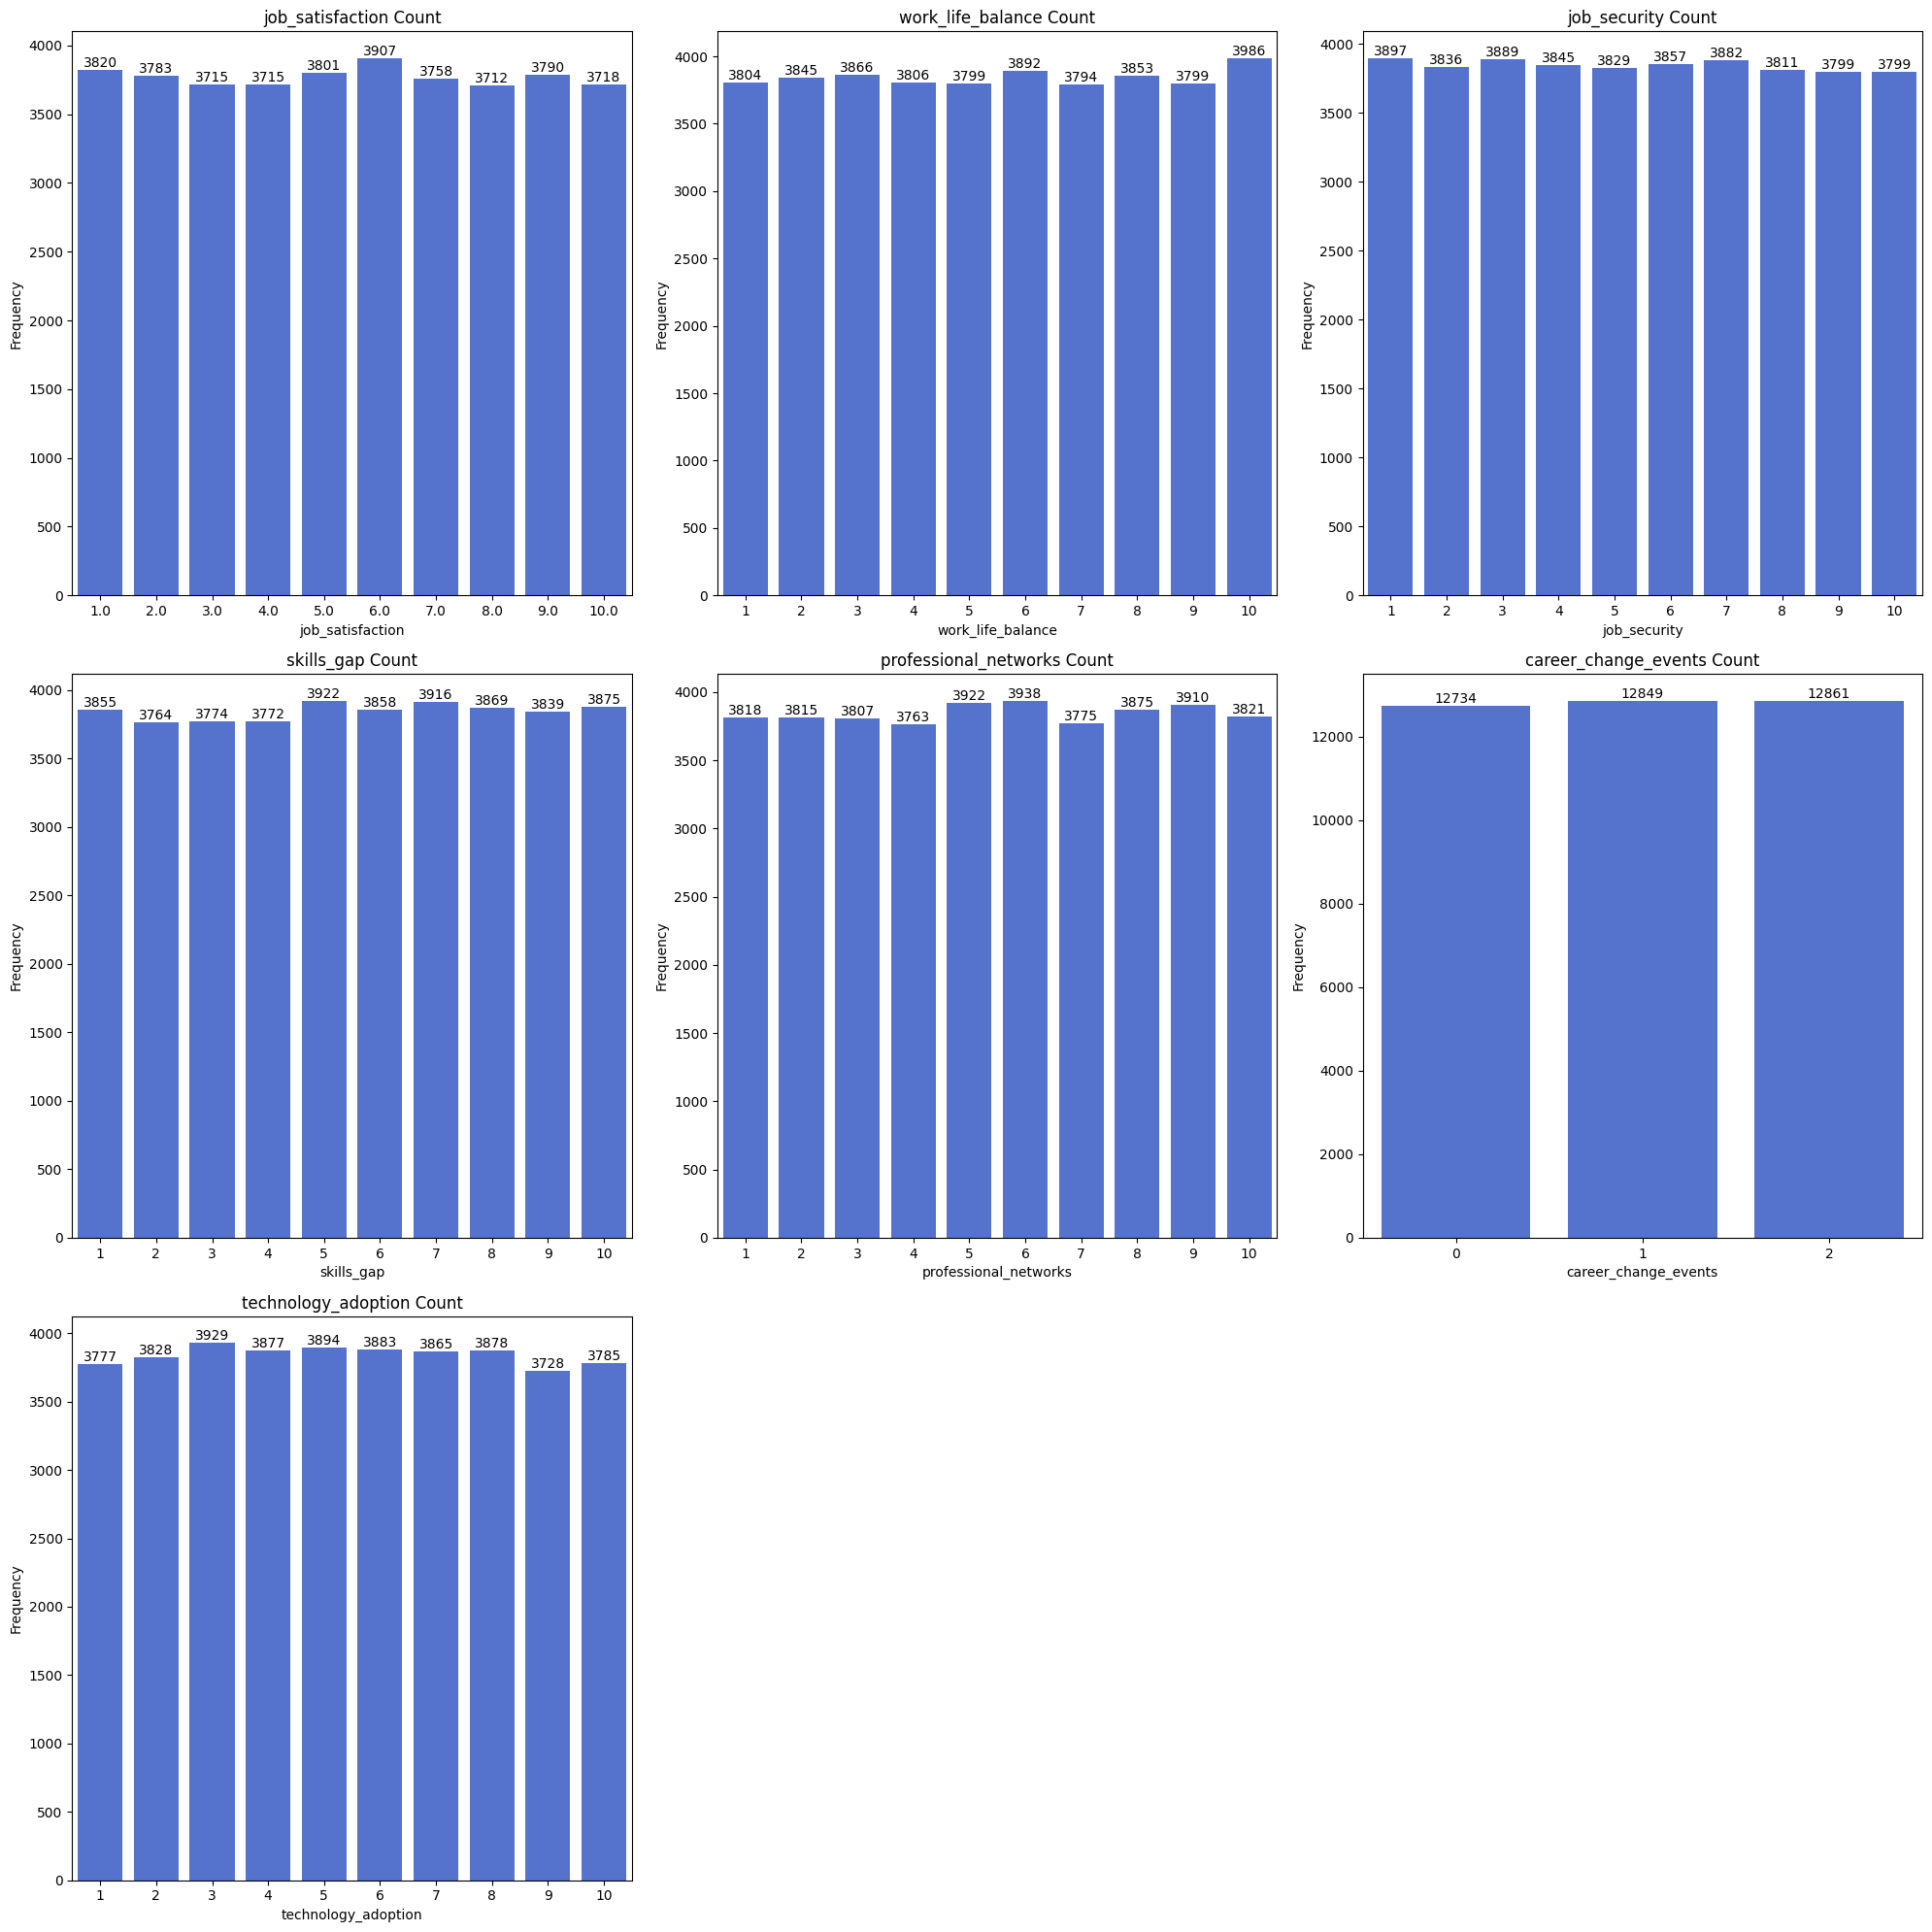

In [ ]:
discrete_columns = ['job_satisfaction', 'work_life_balance', 'job_security', 'skills_gap',
                 'professional_networks', 'career_change_events', 'technology_adoption']

# Distribution plots for numerical features (discrete)
plt.figure(figsize=(20, 20))
num_plots_per_side = math.ceil(math.sqrt(len(discrete_columns)))
for i, col in enumerate(discrete_columns):
    plt.subplot(num_plots_per_side, num_plots_per_side, i+1)
    ax = sns.countplot(data=df, x=col, color='royalblue')
    ax.bar_label(ax.containers[0])
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Categorical EDA

### Countplot for categorical features


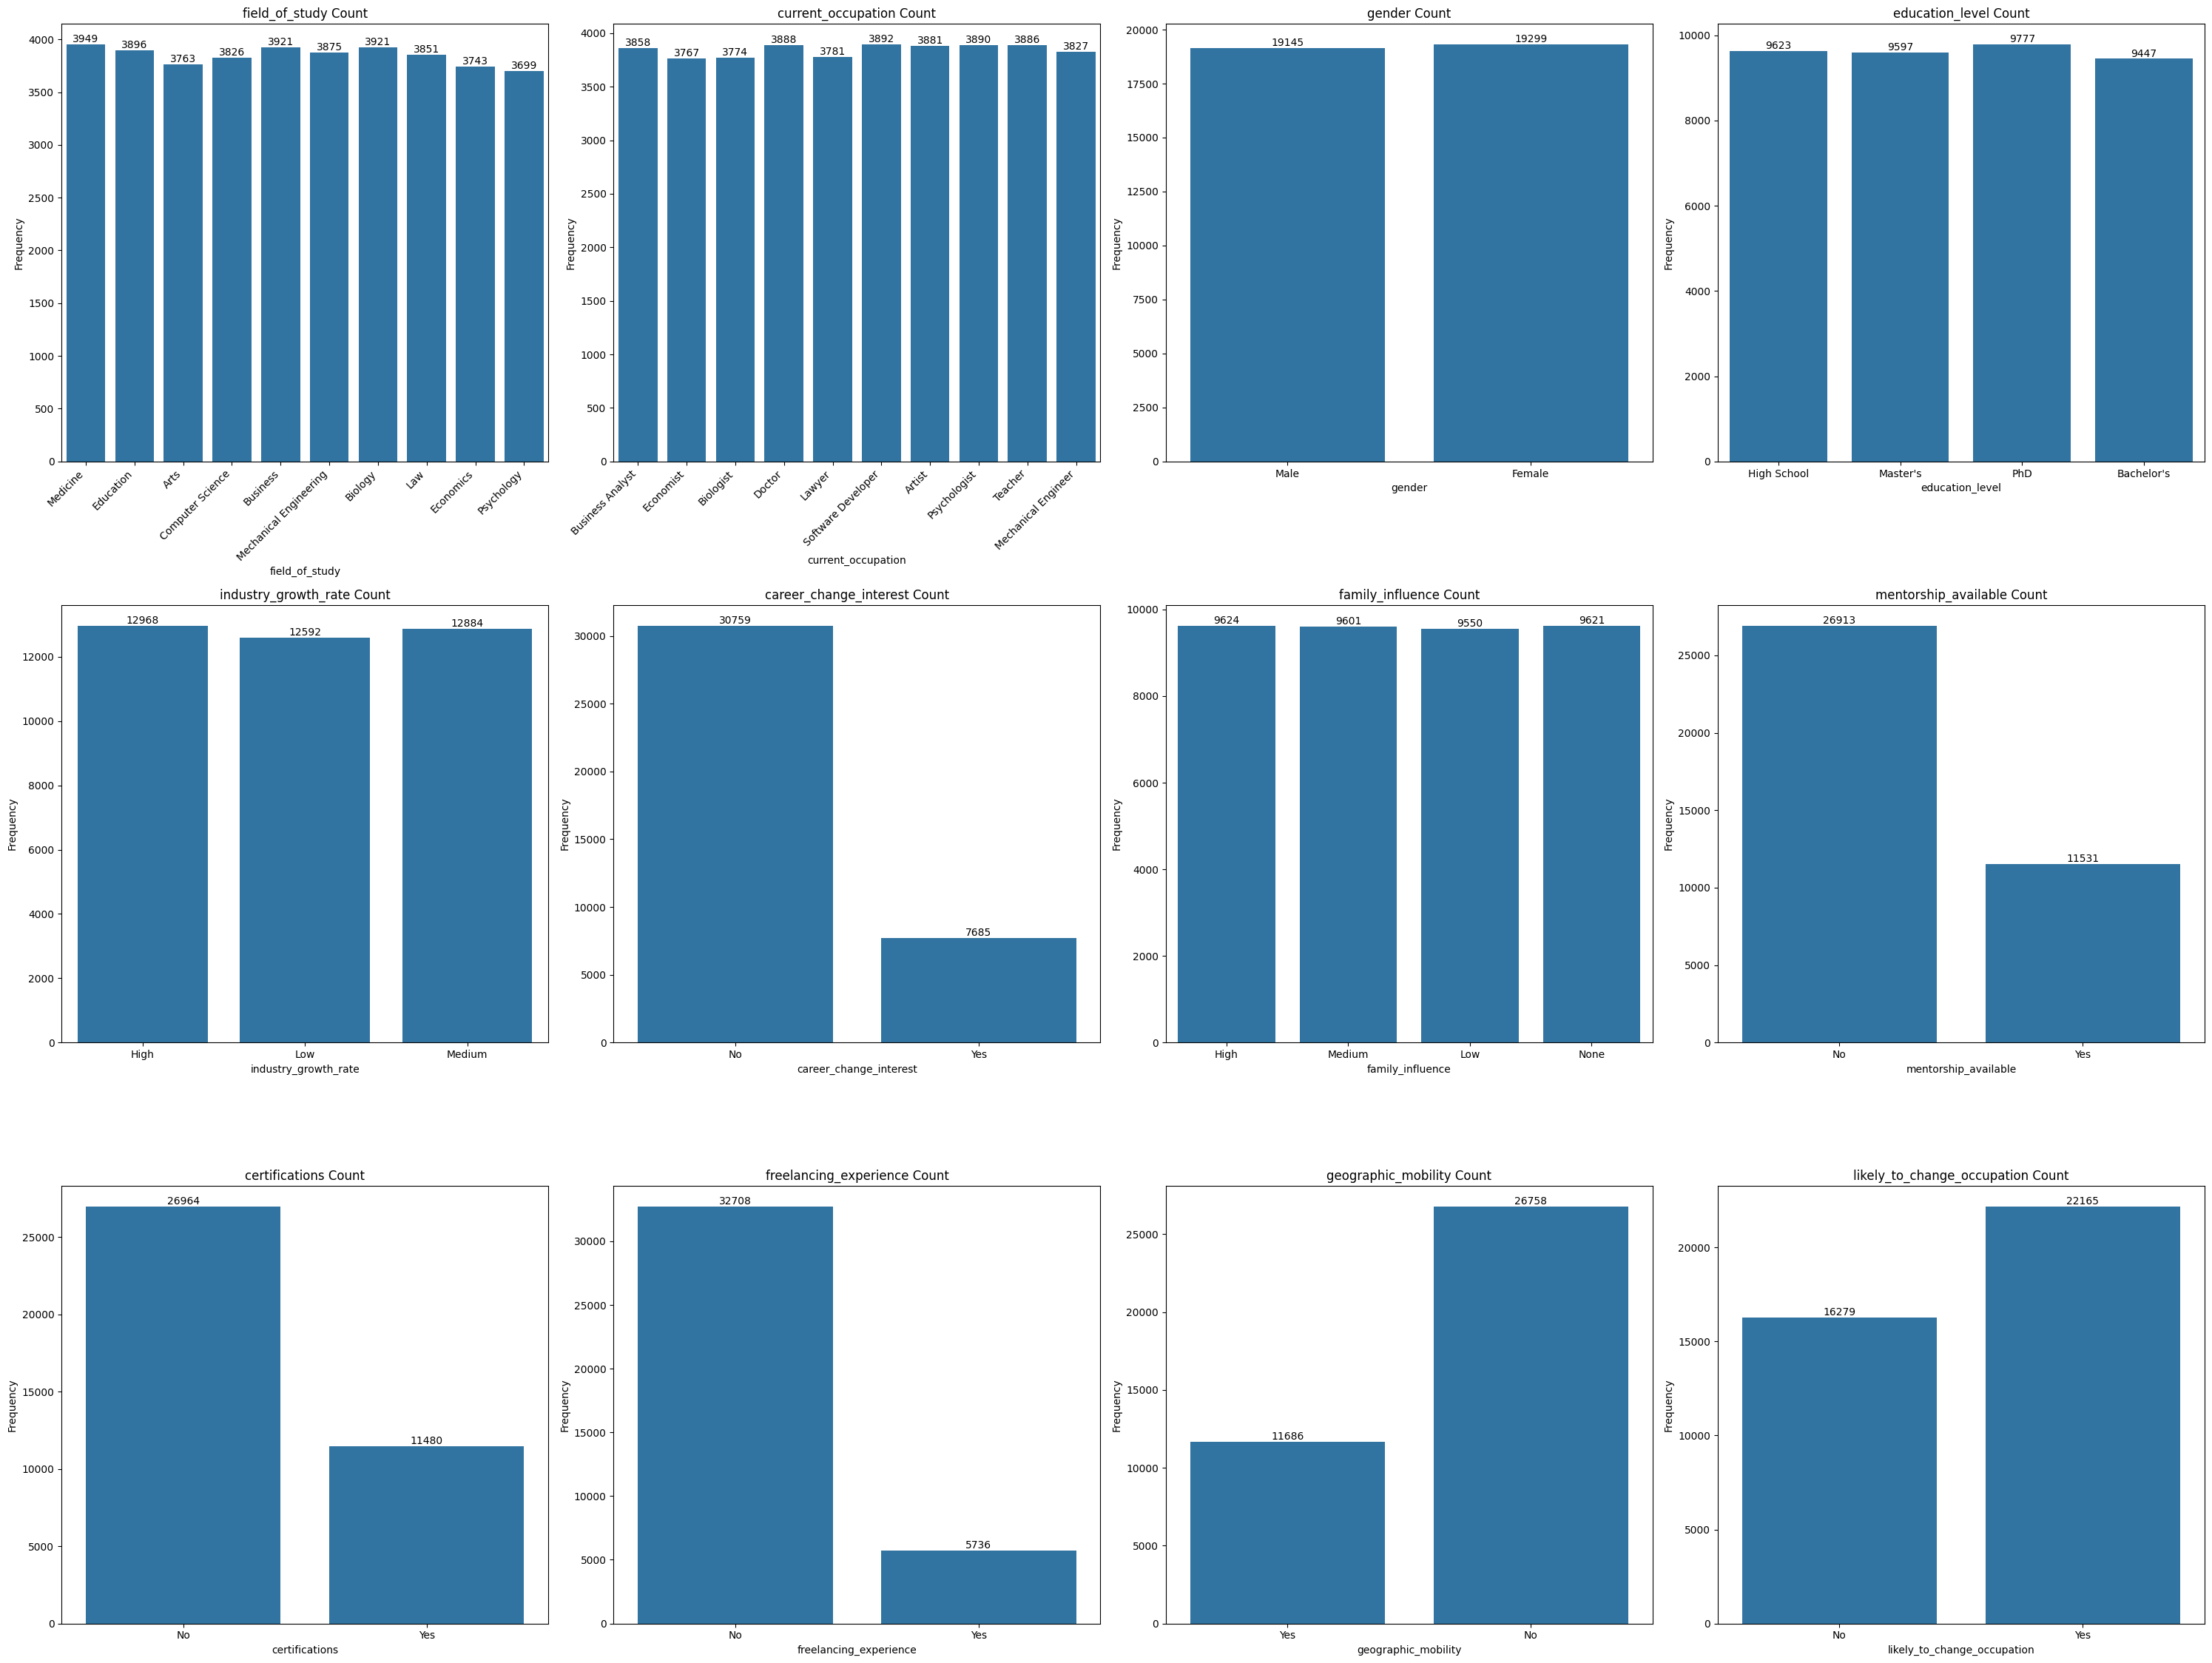

In [ ]:
# Count plots for categorical features
plt.figure(figsize=(30, 30))
num_plots_per_side = math.ceil(math.sqrt(len(categorical_columns)))
for i, col in enumerate(categorical_columns):
    plt.subplot(num_plots_per_side, num_plots_per_side, i+1)
    ax = sns.countplot(data=df, x=col, )
    ax.bar_label(ax.containers[0])
    if col == 'current_occupation' or col == 'field_of_study':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Countplot for categorical data with respect to likely_to_change_occupation

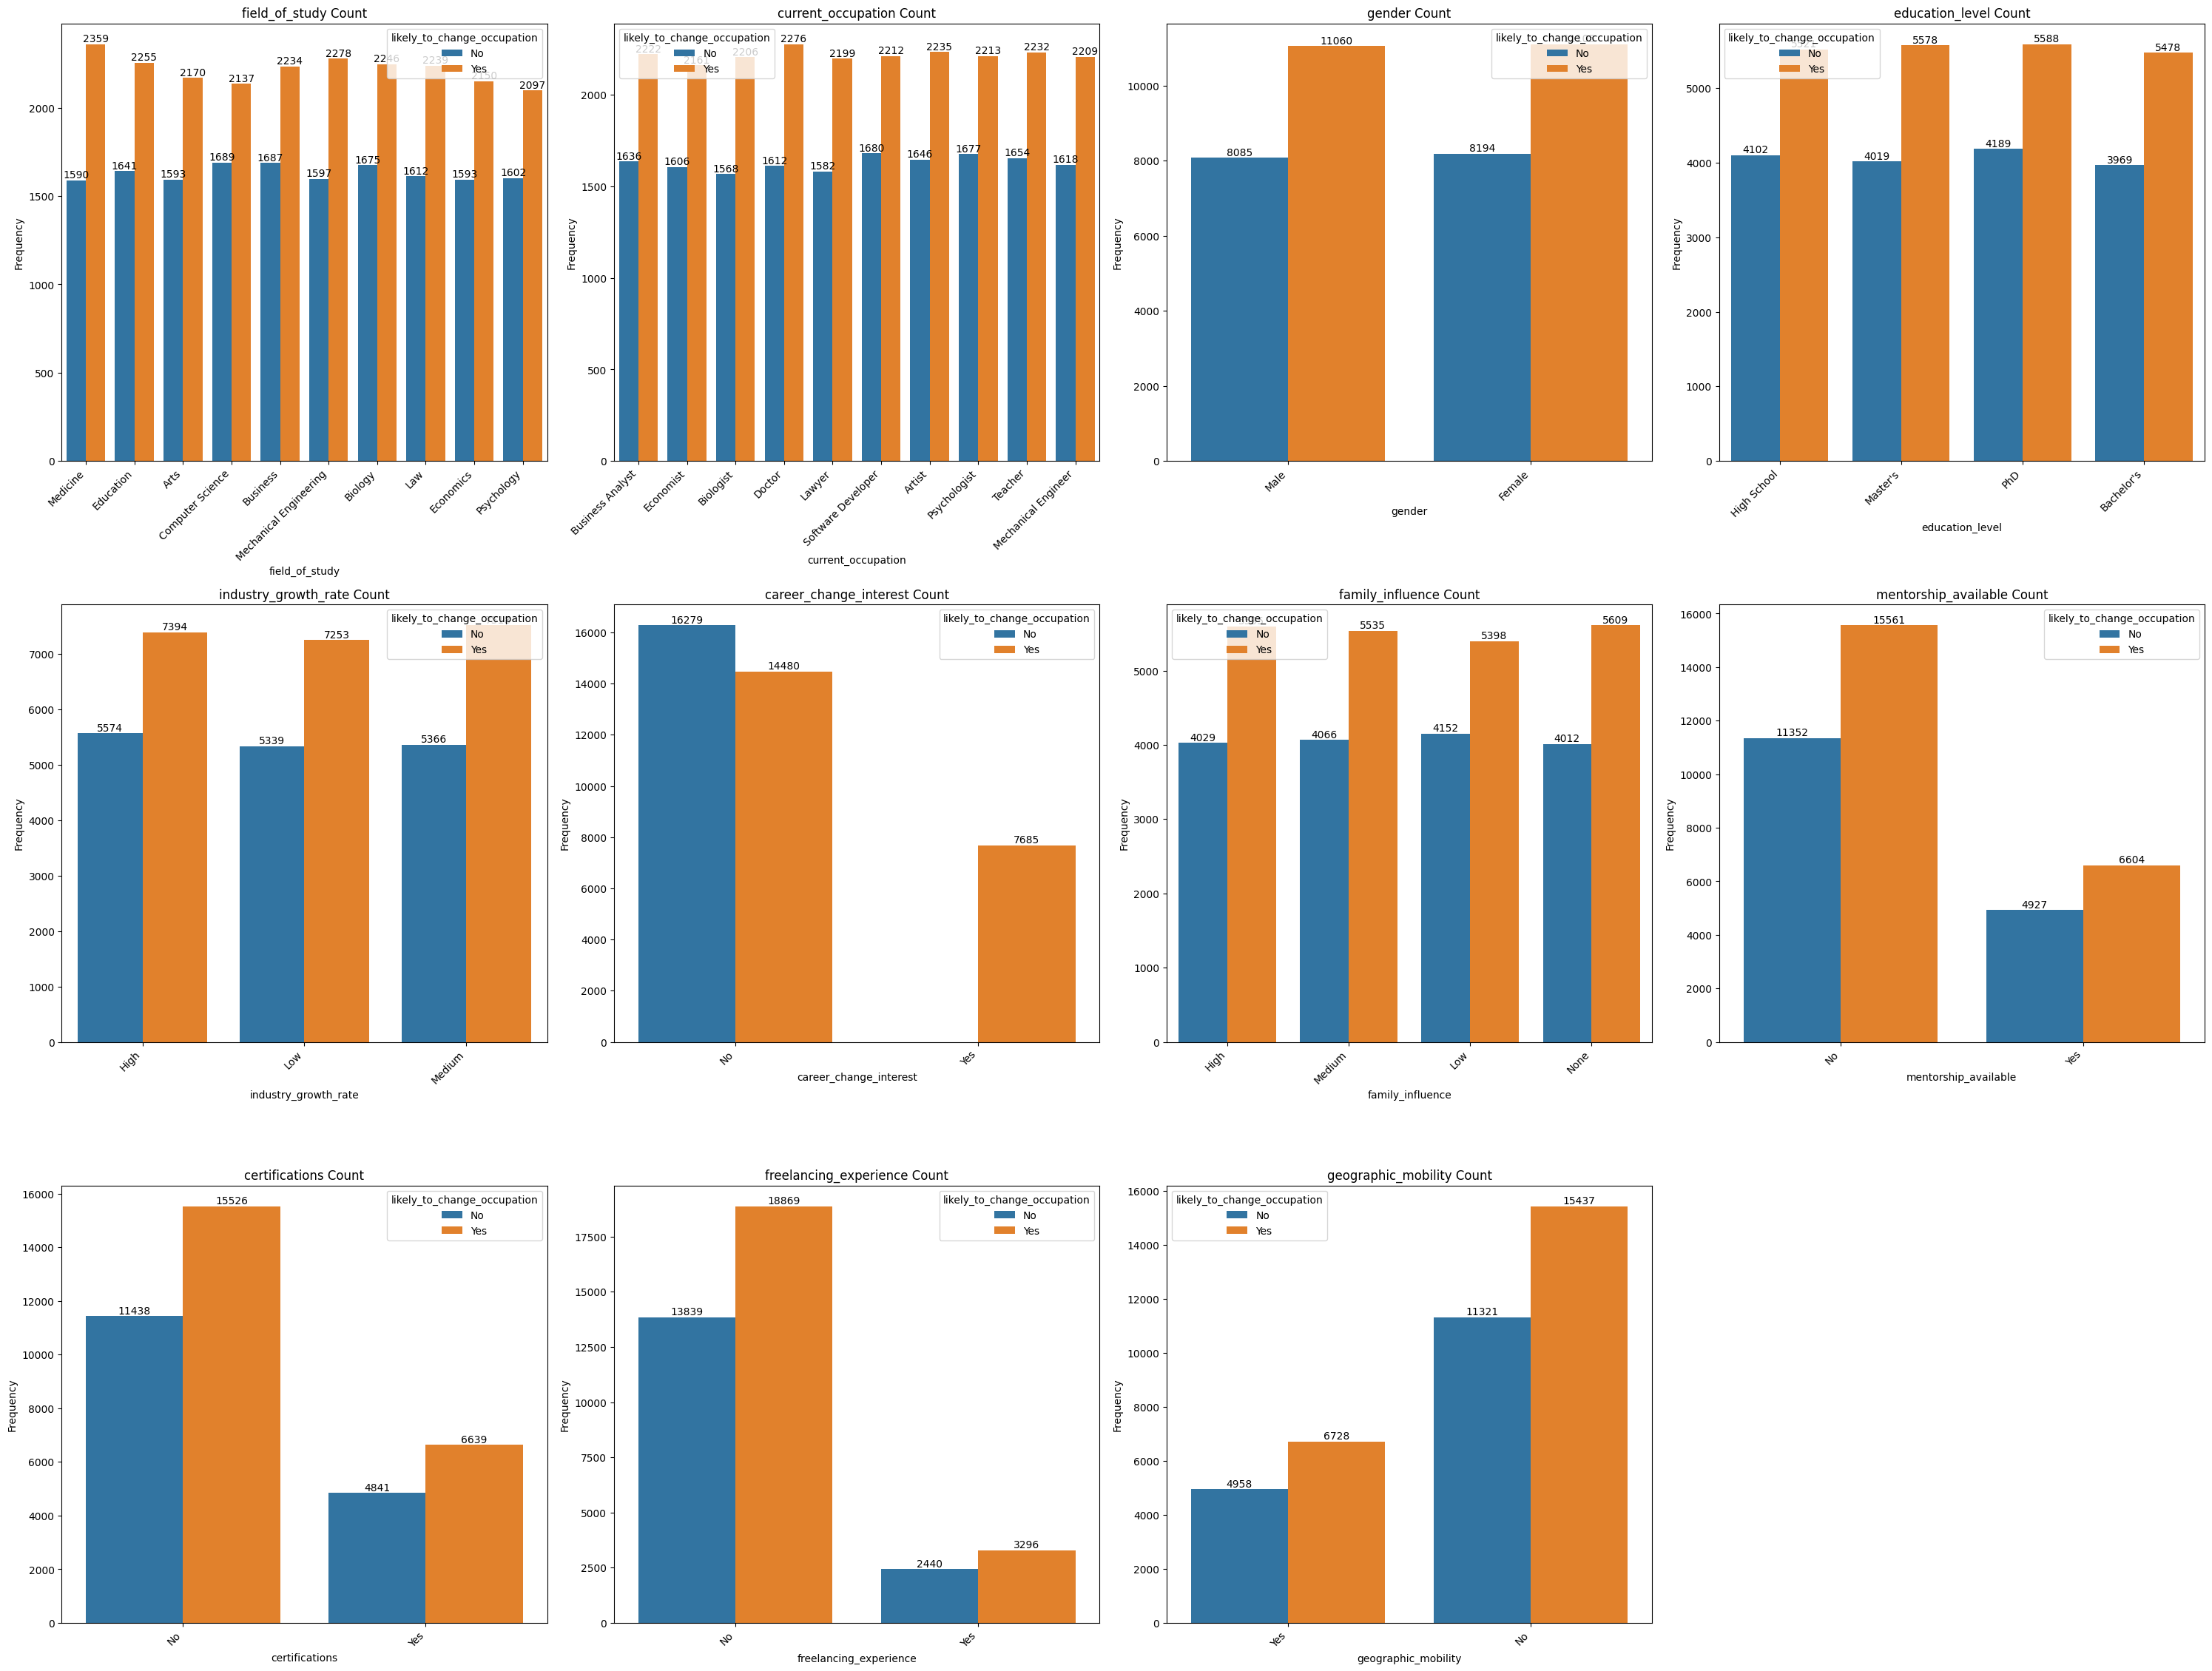

In [ ]:
# Count plots for categorical features with respect to Diagnosis Column
plt.figure(figsize=(30, 30))
num_plots_per_side = math.ceil(math.sqrt(len(categorical_columns)))
for i, col in enumerate(categorical_columns):
    if col == 'likely_to_change_occupation':
        continue
    plt.subplot(num_plots_per_side, num_plots_per_side, i+1)
    ax = sns.countplot(data=df, x=col, hue='likely_to_change_occupation')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    for c in ax.containers:
        ax.bar_label(c)
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Correlation Heatmap

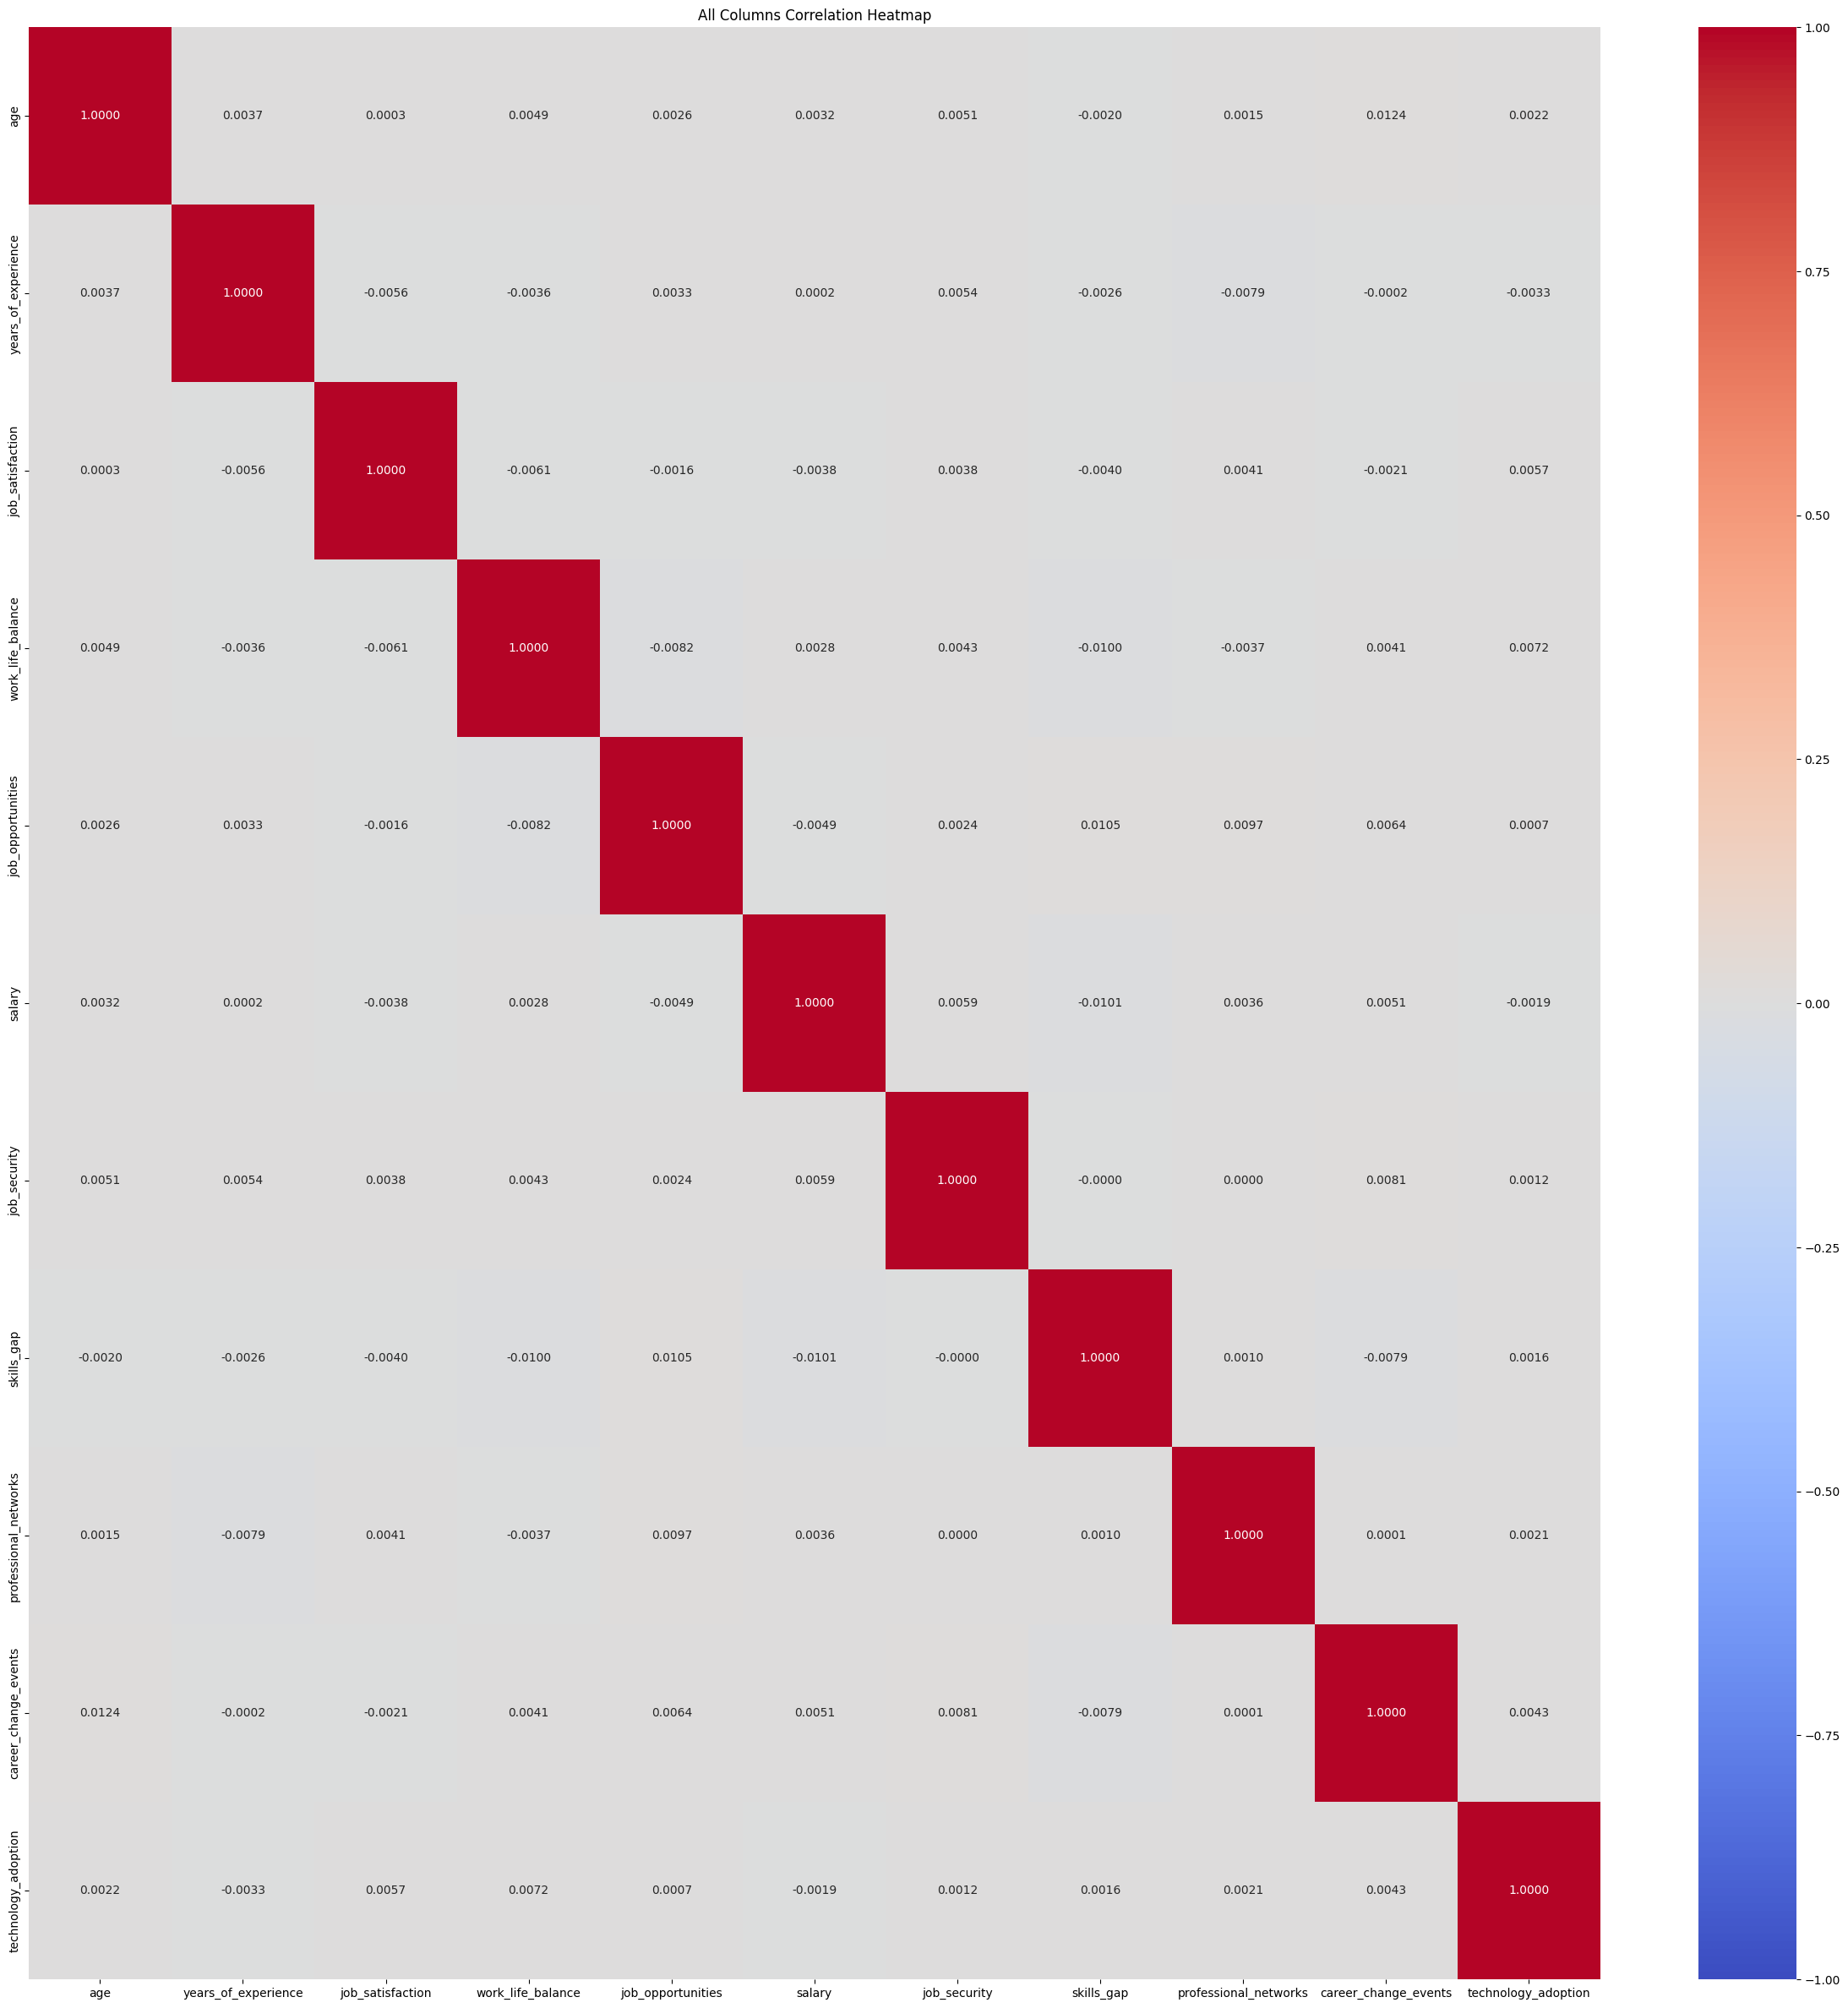

In [ ]:
# All Columns Correlation Heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt='.4f', cmap='coolwarm', vmin=-1.0, vmax=1.0)
plt.title('All Columns Correlation Heatmap')
plt.show()

# Data Preprocessing

Based on our EDA, we discovered a significant bias where all records indicating "career_change_interest" as 'yes' also resulted in the target column being 'yes'. Due to this strong correlation, we have decided to drop the column.

In [ ]:
df.drop(columns=['career_change_interest'], inplace=True)

## Handle Missing Value

Mode and Median imputation for categorical data.  
Mean imputation for numerical data.

In [ ]:
# use median imputation to fill missing values for job_satisfaction
df['job_satisfaction'].fillna(df['job_satisfaction'].median(), inplace=True)

# use mode imputation to fill missing values for family_influence
df['family_influence'].fillna(df['family_influence'].mode()[0], inplace=True)

# use mean imputation to fill missing values for salary
df['salary'].fillna(df['salary'].mean(), inplace=True)

df.isnull().sum()

field_of_study                 0
current_occupation             0
age                            0
gender                         0
years_of_experience            0
education_level                0
industry_growth_rate           0
job_satisfaction               0
work_life_balance              0
job_opportunities              0
salary                         0
job_security                   0
skills_gap                     0
family_influence               0
mentorship_available           0
certifications                 0
freelancing_experience         0
geographic_mobility            0
professional_networks          0
career_change_events           0
technology_adoption            0
likely_to_change_occupation    0
dtype: int64

## Handle Outliers

From IQR it shows that our dataset does not have any outliers.

In [ ]:
def remove_outliers_via_boxplot(df, columns):
    df_clean = df.copy()

    # iterate over each numerical columns
    for col in columns:
        # calculate Q1 and Q3
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        # define lower and upper bounds to identify outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # remove outliers by filtering the rows where the column value is within bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

print("Shape before removing outliers:", df.shape)
df = remove_outliers_via_boxplot(df, numerical_columns)
print("Shape after removing outliers:", df.shape)

Shape before removing outliers: (38444, 22)
Shape after removing outliers: (38444, 22)


## Encode Categorical Columns

In [ ]:
binary_category_cols = [
    'gender',
    'mentorship_available',
    'certifications',
    'freelancing_experience',
    'geographic_mobility',
    'likely_to_change_occupation']

multi_category_cols = ['field_of_study', 'current_occupation']

ordinal_category_cols = ['education_level', 'industry_growth_rate', 'family_influence']

ordinal_category_order_mapping = {
    'education_level': ['High School', 'Bachelor\'s', 'Master\'s', 'PhD'],
    'industry_growth_rate': ['Low', 'Medium', 'High'],
    'family_influence': ['None', 'Low', 'Medium', 'High']
}

Ordinal Encoding for colums:
- educational_level
- industry_growth_rate
- family_influence


In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

def ordinal_encode_columns(df, ordinal_columns_mapping):
    encoders = {}
    mappings = {}

    for col, order in ordinal_columns_mapping.items():
        enc = OrdinalEncoder(categories=[order])
        df[[col]] = enc.fit_transform(df[[col]])
        encoders[col] = enc
        mappings[col] = {category: i for i, category in enumerate(order)}

    return df, encoders, mappings

df, ordinal_encoders, ordinal_mappings = ordinal_encode_columns(df, ordinal_category_order_mapping)

for col, item in ordinal_mappings.items():
    print(f"{col}, {item}")

education_level, {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
industry_growth_rate, {'Low': 0, 'Medium': 1, 'High': 2}
family_influence, {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}


Label Encoding for columns:
- gender
- mentorship_available
- certifications
- freelancing_experience
- geographic_mobility
- likely_to_change_occupation

In [ ]:
def label_encode_columns(df, columns):
    encoders = {}
    mappings = {}

    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le
        mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    return df, encoders, mappings

df, label_encoders, label_mappings = label_encode_columns(df, binary_category_cols)

for col, item in label_mappings.items():
    print(f"{col}, {item}")

gender, {'Female': np.int64(0), 'Male': np.int64(1)}
mentorship_available, {'No': np.int64(0), 'Yes': np.int64(1)}
certifications, {'No': np.int64(0), 'Yes': np.int64(1)}
freelancing_experience, {'No': np.int64(0), 'Yes': np.int64(1)}
geographic_mobility, {'No': np.int64(0), 'Yes': np.int64(1)}
likely_to_change_occupation, {'No': np.int64(0), 'Yes': np.int64(1)}


One-Hot Encoding for columns:
- field_of_study
- current_occupation

In [ ]:
# one-hot encoding for multi-category columns
df = pd.get_dummies(df, columns=multi_category_cols, drop_first=True, dtype=int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     38444 non-null  int64  
 1   gender                                  38444 non-null  int64  
 2   years_of_experience                     38444 non-null  int64  
 3   education_level                         38444 non-null  float64
 4   industry_growth_rate                    38444 non-null  float64
 5   job_satisfaction                        38444 non-null  float64
 6   work_life_balance                       38444 non-null  int64  
 7   job_opportunities                       38444 non-null  int64  
 8   salary                                  38444 non-null  float64
 9   job_security                            38444 non-null  int64  
 10  skills_gap                              38444 non-null  in

In [ ]:
df.head()

age  gender  years_of_experience  education_level  industry_growth_rate  \
0   48       1                    7              0.0                   2.0   
1   44       1                   26              2.0                   0.0   
2   21       0                   27              2.0                   0.0   
3   33       1                   14              3.0                   1.0   
4   28       0                    0              3.0                   0.0   

   job_satisfaction  work_life_balance  job_opportunities    salary  \
0               7.0                 10                 83  198266.0   
1              10.0                  3                 55   96803.0   
2               8.0                  3                 78   65920.0   
3               7.0                  9                 62   85591.0   
4               3.0                  1                  8   43986.0   

   job_security  ...  field_of_study_Psychology  current_occupation_Biologist  \
0             8  ...                          0                             0   
1             9  ...                          0                             0   
2             4  ...                          0                             1   
3             5  ...                          0                             0   
4             3  ...                          0                             0   

   current_occupation_Business Analyst  current_occupation_Doctor  \
0                                    1                          0   
1                                    0                          0   
2                                    0                          0   
3                                    1                          0   
4                                    0                          1   

   current_occupation_Economist  current_occupation_Lawyer  \
0                             0                          0   
1                             1                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   current_occupation_Mechanical Engineer  current_occupation_Psychologist  \
0                                       0                                0   
1                                       0                                0   
2                                       0                                0   
3                                       0                                0   
4                                       0                                0   

   current_occupation_Software Developer  current_occupation_Teacher  
0                                      0                           0  
1                                      0                           0  
2                                      0                           0  
3                                      0                           0  
4                                      0                           0  

[5 rows x 38 columns]

## Train-Test Split

Stratified Train-Test Split.  
70% Training  
30% Test  

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns=['likely_to_change_occupation']), df['likely_to_change_occupation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (26910, 37), y_train shape: (26910,)
X_test shape: (11534, 37), y_test shape: (11534,)


## Normalization

Z-Standardization is used to normalize the data because it transforms features to have a mean of 0 and standard deviation of 1, which aligns with the assumption of normality required by our proposed models.


Normalization is performed before applying SMOTE to ensure that all features contribute equally to the distance calculations used in generating synthetic samples. Without normalization, features with larger scales could disproportionately influence the synthetic data generation, leading to biased or unrealistic samples.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# original dataset
X_train[numerical_columns + ordinal_category_cols] = scaler.fit_transform(X_train[numerical_columns + ordinal_category_cols])

X_test[numerical_columns + ordinal_category_cols] = scaler.transform(X_test[numerical_columns + ordinal_category_cols])

In [ ]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## SMOTE

Apply SMOTE to handle class imbalance.

In [ ]:
from imblearn.over_sampling import SMOTE

X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)
print("Train set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTrain set class distribution after SMOTE:")
print(y_train_smote.value_counts(normalize=True))

Train set class distribution:
likely_to_change_occupation
1    0.576551
0    0.423449
Name: proportion, dtype: float64

Train set class distribution after SMOTE:
likely_to_change_occupation
1    0.5
0    0.5
Name: proportion, dtype: float64


## Feature Selection

ANOVA (Analysis of Variance) is a statistical test used to determine whether there are significant differences between the means of different groups. In feature selection, ANOVA evaluates each feature to see if its values differ significantly across the classes of the target variable.

The F-value measures the ratio of variance between groups to the variance within groups — a higher F-value suggests the feature better distinguishes between classes. The p-value indicates the probability that the observed differences happened by chance; a p-value less than 0.05 typically means the feature is statistically significant and relevant for classification.

In [ ]:
from sklearn.feature_selection import f_classif

# ANOVA F-test
F_values, p_values = f_classif(X_train, y_train)
anova_results = pd.DataFrame({
    'Feature': X_train.columns,
    'F-Value': F_values,
    'p-Value': p_values
})
anova_results.sort_values(by='F-Value', ascending=False, inplace=True)
print(anova_results)

# filter only statistically significant features (p < 0.05)
print("\n-----------------------------------------------------------------------\n")
print("Statistically significant features with p-value < 0.05:")
significant_features = anova_results[anova_results['p-Value'] < 0.05]
significant_features = significant_features.sort_values(by='F-Value', ascending=False)
print(significant_features)

# Extract the list of statistically significant features
selected_features = significant_features['Feature'].tolist()

# Subset the training and test sets to keep only these features
X_train_anova = X_train[selected_features]
X_test_anova = X_test[selected_features]

                                   Feature       F-Value        p-Value
5                         job_satisfaction  13960.833160   0.000000e+00
8                                   salary    913.340500  2.458668e-197
26                 field_of_study_Medicine      6.919484   8.531012e-03
21         field_of_study_Computer Science      5.821509   1.583800e-02
16                   professional_networks      1.844386   1.744491e-01
6                        work_life_balance      1.672196   1.959758e-01
0                                      age      1.576218   2.093172e-01
17                    career_change_events      1.528358   2.163699e-01
36              current_occupation_Teacher      1.229730   2.674695e-01
35   current_occupation_Software Developer      1.202467   2.728389e-01
25   field_of_study_Mechanical Engineering      1.050276   3.054528e-01
9                             job_security      0.907219   3.408620e-01
34         current_occupation_Psychologist      0.837181   3.602

In [ ]:
from sklearn.feature_selection import f_classif

# ANOVA F-test
F_values, p_values = f_classif(X_train_smote, y_train_smote)
anova_results = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'F-Value': F_values,
    'p-Value': p_values
})
anova_results.sort_values(by='F-Value', ascending=False, inplace=True)
print(anova_results)

# filter only statistically significant features (p < 0.05)
print("\n-----------------------------------------------------------------------\n")
print("Statistically significant features (after SMOTE) with p-value < 0.05:")
significant_features_smote = anova_results[anova_results['p-Value'] < 0.05]
significant_features_smote = significant_features_smote.sort_values(by='F-Value', ascending=False)
print(significant_features_smote)

# Extract the list of statistically significant features
selected_features_smote = significant_features_smote['Feature'].tolist()
X_train_smote_anova = X_train_smote[selected_features_smote]
X_test_smote_anova = X_test[selected_features_smote]

                                   Feature       F-Value        p-Value
5                         job_satisfaction  17711.223660   0.000000e+00
8                                   salary   1137.038033  7.820212e-245
13                          certifications     76.259835   2.609195e-18
12                    mentorship_available     62.536375   2.702004e-15
26                 field_of_study_Medicine     61.097145   5.603815e-15
1                                   gender     55.674880   8.774165e-14
15                     geographic_mobility     48.080854   4.170023e-12
14                  freelancing_experience     46.336714   1.013913e-11
36              current_occupation_Teacher     45.663175   1.429194e-11
25   field_of_study_Mechanical Engineering     44.919798   2.087827e-11
32               current_occupation_Lawyer     39.547535   3.244314e-10
28            current_occupation_Biologist     36.373874   1.647114e-09
30               current_occupation_Doctor     36.146479   1.850

Mutual Information (MI) is a statistical measure that quantifies the dependency between a feature and the target variable. It determines how much knowing the value of a feature reduces uncertainty about the target. Features with higher MI scores are considered more informative and are thus more significant for prediction.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute MI scores between each feature and the categorical target
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)

# Create a DataFrame of results
mi_results = pd.DataFrame({
    'Feature': X_train.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)
print(mi_results)

# Filter only those with MI score > 0.005
print("\n-----------------------------------------------------------------------\n")
print("Significant features MI score > 0.005:")
mi_significant_features = mi_results[mi_results['MI Score'] > 0.005]
print(mi_significant_features)

# Get the list of significant feature names
selected_features = mi_significant_features['Feature'].tolist()

# Subset the training and test sets to keep only these features
X_train_mi = X_train[selected_features]
X_test_mi = X_test[selected_features]

                                   Feature  MI Score
5                         job_satisfaction  0.304409
8                                   salary  0.073269
29     current_occupation_Business Analyst  0.008099
1                                   gender  0.007185
6                        work_life_balance  0.004437
16                   professional_networks  0.004397
33  current_occupation_Mechanical Engineer  0.003895
31            current_occupation_Economist  0.002930
18                     technology_adoption  0.002899
30               current_occupation_Doctor  0.002676
14                  freelancing_experience  0.002445
17                    career_change_events  0.002159
3                          education_level  0.001778
11                        family_influence  0.001561
23                field_of_study_Education  0.001381
20                 field_of_study_Business  0.000915
9                             job_security  0.000678
4                     industry_growth_rate  0.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute MI scores between each feature and the categorical target
mi_scores = mutual_info_classif(X_train_smote, y_train_smote, random_state=42)

# Create a DataFrame of results
mi_results = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)
print(mi_results)

# filter only those with MI score > 0.005
print("\n-----------------------------------------------------------------------\n")
print("Significant features (after SMOTE) MI score > 0.005:")
mi_significant_features_smote = mi_results[mi_results['MI Score'] > 0.005]
print(mi_significant_features_smote)

# Get the list of significant feature names
selected_features_smote = mi_significant_features_smote['Feature'].tolist()
X_train_smote_mi = X_train_smote[selected_features_smote]
X_test_smote_mi = X_test[selected_features_smote]

                                   Feature  MI Score
5                         job_satisfaction  0.354084
7                        job_opportunities  0.093554
0                                      age  0.091264
2                      years_of_experience  0.090941
6                        work_life_balance  0.080561
16                   professional_networks  0.080413
18                     technology_adoption  0.080221
8                                   salary  0.077692
9                             job_security  0.076274
10                              skills_gap  0.071991
3                          education_level  0.042315
11                        family_influence  0.039704
4                     industry_growth_rate  0.027102
17                    career_change_events  0.024168
1                                   gender  0.007821
29     current_occupation_Business Analyst  0.007576
33  current_occupation_Mechanical Engineer  0.003930
31            current_occupation_Economist  0.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("PCA for original dataset:")
print("Original shape:", X_train.shape)
print("Reduced shape:", X_train_pca.shape)

print("-------------------------------------------")

pca_smote = PCA(n_components=0.95)
X_train_smote_pca = pca_smote.fit_transform(X_train_smote)
X_test_smote_pca = pca_smote.transform(X_test)
print("PCA for SMOTE dataset:")
print("Original shape:", X_train_smote.shape)
print("Reduced shape:", X_train_smote_pca.shape)

PCA for original dataset:
Original shape: (26910, 37)
Reduced shape: (26910, 27)
-------------------------------------------
PCA for SMOTE dataset:
Original shape: (31030, 37)
Reduced shape: (31030, 27)


## Final Datasets

*   Dataset 1 – Original Dataset
*   Dataset 2 – SMOTE Dataset
*   Dataset 3 – ANOVA Feature-Selected Dataset
*   Dataset 4 – ANOVA + SMOTE Dataset
*   Dataset 5 – Mutual Information (MI) Feature-Selected Dataset
*   Dataset 6 – MI + SMOTE Dataset
*   Dataset 7 – PCA-Reduced Dataset
*   Dataset 8 – PCA + SMOTE Dataset


In [ ]:
# original dataset
d1_x_train = X_train
d1_x_test = X_test
d1_y_train = y_train
d1_y_test = y_test

# smote dataset
d2_x_train = X_train_smote
d2_x_test = X_test
d2_y_train = y_train_smote
d2_y_test = y_test

# anova dataset
d3_x_train = X_train_anova
d3_x_test = X_test_anova
d3_y_train = y_train
d3_y_test = y_test

# anova, smote dataset
d4_x_train = X_train_smote_anova
d4_x_test = X_test_smote_anova
d4_y_train = y_train_smote
d4_y_test = y_test

# mi dataset
d5_x_train = X_train_mi
d5_x_test = X_test_mi
d5_y_train = y_train
d5_y_test = y_test

# mi, smote dataset
d6_x_train = X_train_smote_mi
d6_x_test = X_test_smote_mi
d6_y_train = y_train_smote
d6_y_test = y_test

# pca dataset
d7_x_train = X_train_pca
d7_x_test = X_test_pca
d7_y_train = y_train
d7_y_test = y_test

# pca, smote dataset
d8_x_train = X_train_smote_pca
d8_x_test = X_test_smote_pca
d8_y_train = y_train_smote
d8_y_test = y_test

datasets = [
    [d1_x_train, d1_y_train, d1_x_test, d1_y_test],
    [d2_x_train, d2_y_train, d2_x_test, d2_y_test],
    [d3_x_train, d3_y_train, d3_x_test, d3_y_test],
    [d4_x_train, d4_y_train, d4_x_test, d4_y_test],
    [d5_x_train, d5_y_train, d5_x_test, d5_y_test],
    [d6_x_train, d6_y_train, d6_x_test, d6_y_test],
    [d7_x_train, d7_y_train, d7_x_test, d7_y_test],
    [d8_x_train, d8_y_train, d8_x_test, d8_y_test]
]

# Models Development


In [ ]:
import os
import pickle

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

save_dir = "/content/logistic_models"
os.makedirs(save_dir, exist_ok=True)

def logistic_regression_classifier(x_train, y_train, x_test, y_test):
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    y_prob = lr.predict_proba(x_test)[:, 1]
    return lr, y_pred, y_prob

logistic_results = []
for i in range(len(datasets)):
    print(f"Executing for dataset {i+1}...")
    x_train, y_train, x_test, y_test = datasets[i]
    model, y_pred, y_prob = logistic_regression_classifier(x_train, y_train, x_test, y_test)

    # Save model
    filename = os.path.join(save_dir, f"logistic_model_{i+1}.pkl")
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

    # Store predictions and probabilities
    logistic_results.append((y_pred, y_prob))

Executing for dataset 1...
Executing for dataset 2...
Executing for dataset 3...
Executing for dataset 4...
Executing for dataset 5...
Executing for dataset 6...
Executing for dataset 7...
Executing for dataset 8...


In [ ]:
# Save results
results_path = os.path.join(save_dir, 'logistic_results.pkl')
with open(results_path, 'wb') as f:
    pickle.dump(logistic_results, f)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

save_dir = "/content/tree_models"
os.makedirs(save_dir, exist_ok=True)

def decision_tree_classifier(x_train, y_train, x_test, y_test):
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    y_prob = dt.predict_proba(x_test)[:, 1]
    return dt, y_pred, y_prob

tree_results = []
for i in range(len(datasets)):
    print(f"Executing for dataset {i+1}...")
    x_train, y_train, x_test, y_test = datasets[i]
    model, y_pred, y_prob = decision_tree_classifier(x_train, y_train, x_test, y_test)

    # Save model
    filename = os.path.join(save_dir, f"tree_model_{i+1}.pkl")
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

    # Store predictions and probabilities
    tree_results.append((y_pred, y_prob))


Executing for dataset 1...
Executing for dataset 2...
Executing for dataset 3...
Executing for dataset 4...
Executing for dataset 5...
Executing for dataset 6...
Executing for dataset 7...
Executing for dataset 8...


In [ ]:
# Save results
results_path = os.path.join(save_dir, 'tree_results.pkl')
with open(results_path, 'wb') as f:
    pickle.dump(tree_results, f)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

save_dir = "/content/rf_models"
os.makedirs(save_dir, exist_ok=True)

def random_forest_classifier(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    y_prob = rf.predict_proba(x_test)[:, 1]
    return rf, y_pred, y_prob

rf_results = []
for i in range(len(datasets)):
    print(f"Executing for dataset {i+1}...")
    x_train, y_train, x_test, y_test = datasets[i]
    model, y_pred, y_prob = random_forest_classifier(x_train, y_train, x_test, y_test)

    # Save model
    filename = os.path.join(save_dir, f"rf_model_{i+1}.pkl")
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

    # Store predictions and probabilities
    rf_results.append((y_pred, y_prob))

Executing for dataset 1...
Executing for dataset 2...
Executing for dataset 3...
Executing for dataset 4...
Executing for dataset 5...
Executing for dataset 6...
Executing for dataset 7...
Executing for dataset 8...


In [ ]:
# Save results
results_path = os.path.join(save_dir, 'rf_results.pkl')
with open(results_path, 'wb') as f:
    pickle.dump(rf_results, f)

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

save_dir = "/content/svm_models"
os.makedirs(save_dir, exist_ok=True)

def support_vector_machine(x_train, y_train, x_test, y_test):
    svm = SVC(probability=True, random_state=42)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    y_prob = svm.predict_proba(x_test)[:, 1]
    return svm, y_pred, y_prob

svm_results = []
for i in range(len(datasets)):
    print(f"Executing for dataset {i+1}...")
    x_train, y_train, x_test, y_test = datasets[i]
    model, y_pred, y_prob = support_vector_machine(x_train, y_train, x_test, y_test)

    # Save model
    filename = os.path.join(save_dir, f"svm_model_{i+1}.pkl")
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

    # Store predictions and probabilities
    svm_results.append((y_pred, y_prob))

Executing for dataset 1...
Executing for dataset 2...
Executing for dataset 3...
Executing for dataset 4...
Executing for dataset 5...
Executing for dataset 6...
Executing for dataset 7...
Executing for dataset 8...


In [ ]:
results_path = os.path.join(save_dir, 'svm_results.pkl')
# Save to a file
with open(results_path, 'wb') as f:
    pickle.dump(svm_results, f)

## XGBoost

In [ ]:
from xgboost import XGBClassifier

save_dir = "/content/xgb_models"
os.makedirs(save_dir, exist_ok=True)

def xgboost_classifier(x_train, y_train, x_test, y_test):
  xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
  xgb.fit(x_train, y_train)
  y_pred = xgb.predict(x_test)
  y_prob = xgb.predict_proba(x_test)[:, 1]

  return xgb, y_pred, y_prob

# Apply XGBoost
xgb_results = []
for i in range(len(datasets)):
  print(f"Executing for dataset {i+1}...")
  x_train, y_train, x_test, y_test = datasets[i]
  model, y_pred, y_prob = xgboost_classifier(x_train, y_train, x_test, y_test)

  # Save model
  filename = os.path.join(save_dir, f"xgb_model_{i+1}.pkl")
  with open(filename, 'wb') as f:
      pickle.dump(model, f)

  # Store predictions and probabilities
  xgb_results.append((y_pred, y_prob))

Executing for dataset 1...
Executing for dataset 2...
Executing for dataset 3...
Executing for dataset 4...
Executing for dataset 5...
Executing for dataset 6...
Executing for dataset 7...
Executing for dataset 8...


In [ ]:
results_path = os.path.join(save_dir, 'xgb_results.pkl')
# Save to a file
with open(results_path, 'wb') as f:
  # change svm_results to  xgb_results
    pickle.dump(xgb_results, f)

# Models Evaluation

Evaluation Metrics
- Confusion Matrix (Supplementary)
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC


In [ ]:
# emphasis on recall to ensure individuals at risk of occupational change are correctly identified

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_fscore_support

def evaluation(y_pred, y_prob, y_test):
  accuracy = accuracy_score(y_test, y_pred)
  precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
  roc_auc = roc_auc_score(y_test, y_prob)
  cm = confusion_matrix(y_test, y_pred)

  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print(f"ROC-AUC: {roc_auc:.4f}")

  # plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

  # plot roc curve
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
  plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend()
  plt.grid()
  plt.show()

  return round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4), round(roc_auc, 4)

## Logistic Regression

Evaluating dataset 1 for Logistic Regression
Accuracy: 0.7732
Precision: 0.7933
Recall: 0.8203
F1-Score: 0.8066
ROC-AUC: 0.8696


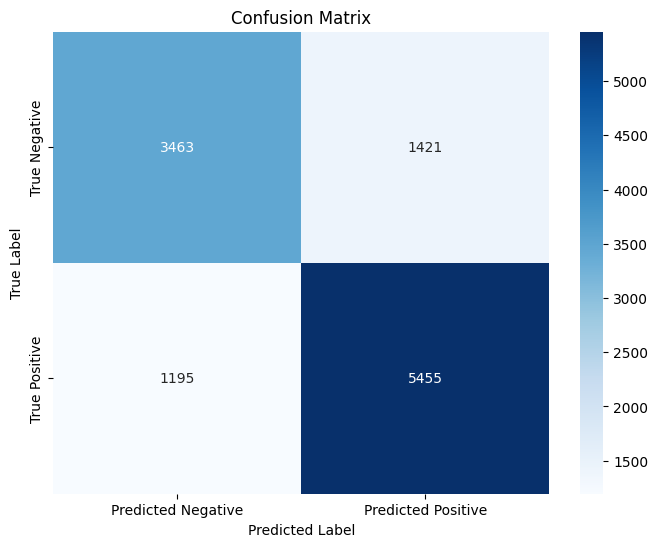

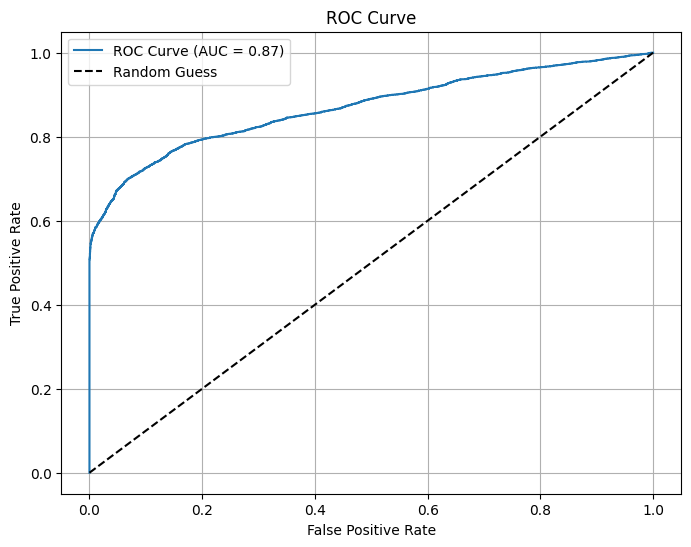

---------------------------------------------------------------------------
Evaluating dataset 2 for Logistic Regression
Accuracy: 0.7786
Precision: 0.8139
Recall: 0.7985
F1-Score: 0.8061
ROC-AUC: 0.8628


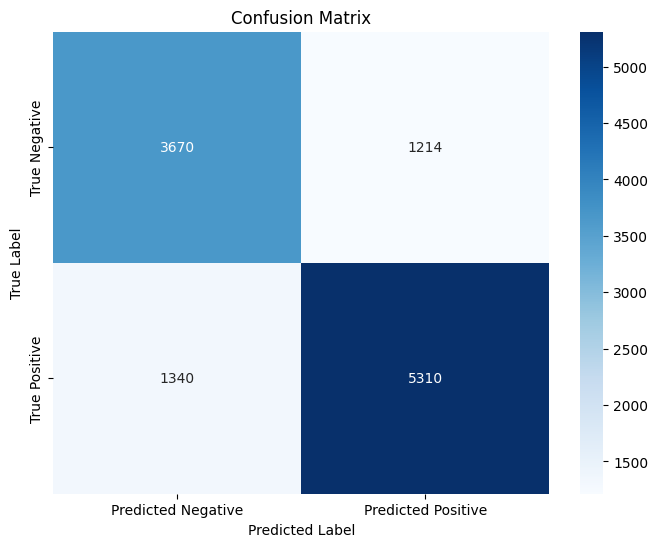

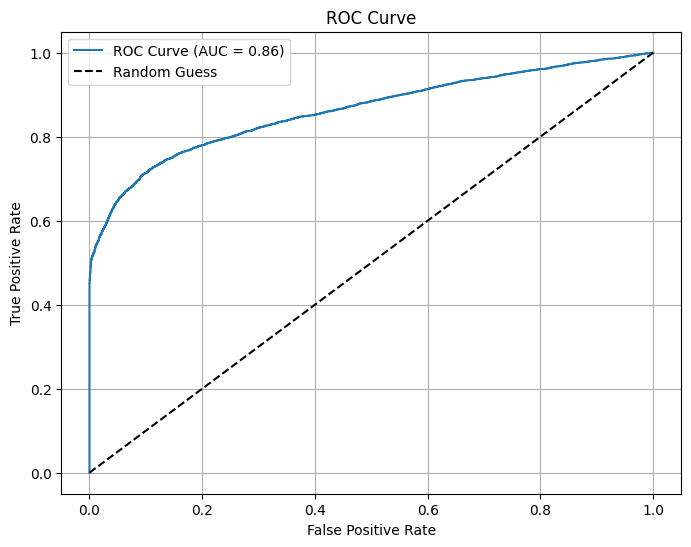

---------------------------------------------------------------------------
Evaluating dataset 3 for Logistic Regression
Accuracy: 0.7732
Precision: 0.7942
Recall: 0.8188
F1-Score: 0.8063
ROC-AUC: 0.8698


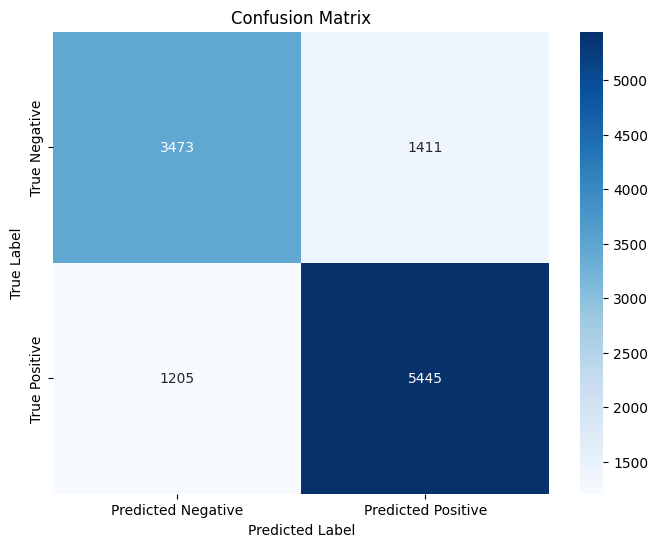

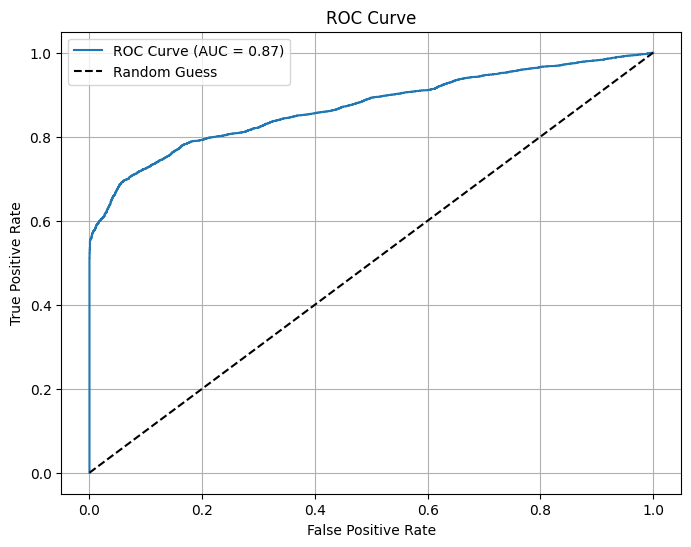

---------------------------------------------------------------------------
Evaluating dataset 4 for Logistic Regression
Accuracy: 0.7792
Precision: 0.8145
Recall: 0.7989
F1-Score: 0.8066
ROC-AUC: 0.8630


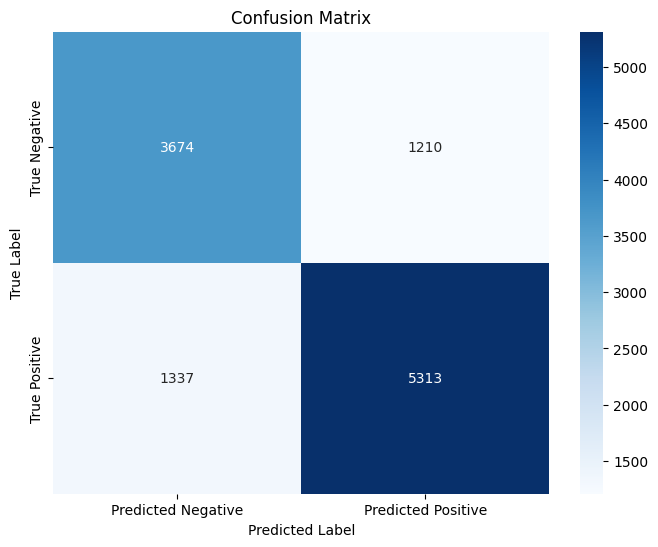

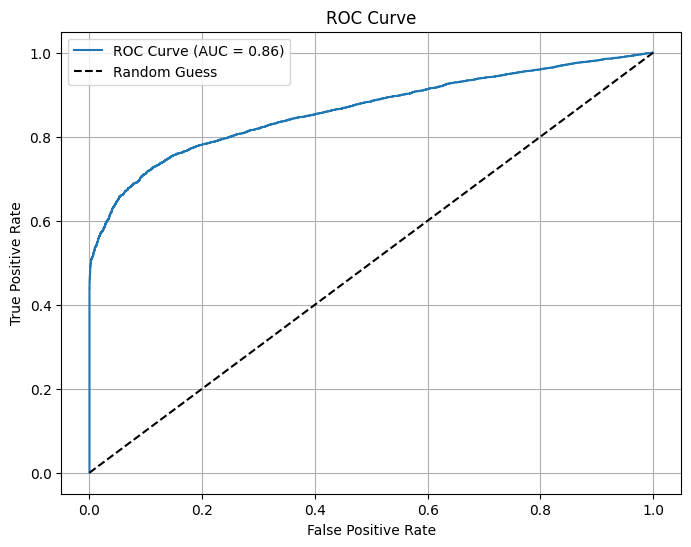

---------------------------------------------------------------------------
Evaluating dataset 5 for Logistic Regression
Accuracy: 0.7728
Precision: 0.7935
Recall: 0.8192
F1-Score: 0.8062
ROC-AUC: 0.8699


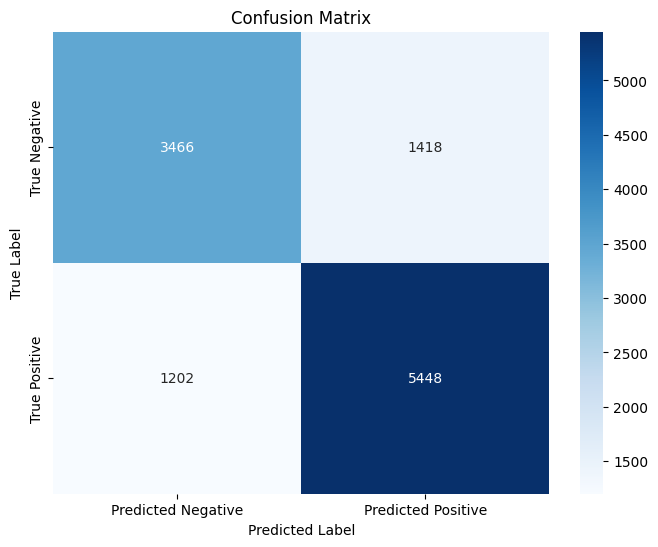

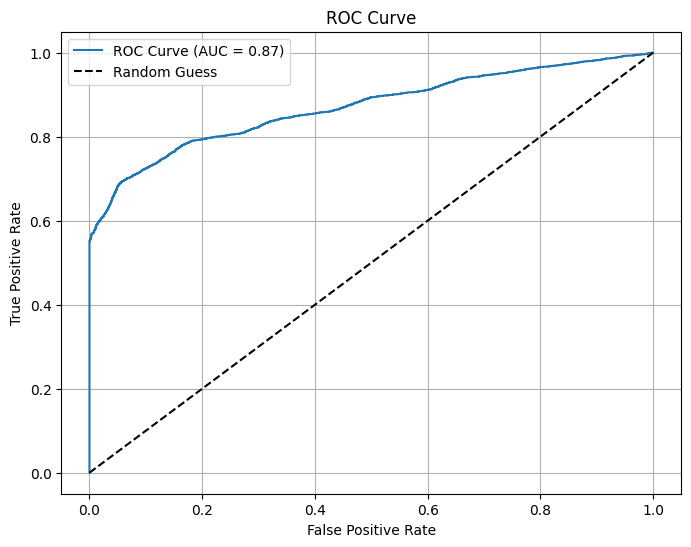

---------------------------------------------------------------------------
Evaluating dataset 6 for Logistic Regression
Accuracy: 0.7947
Precision: 0.8417
Recall: 0.7931
F1-Score: 0.8167
ROC-AUC: 0.8690


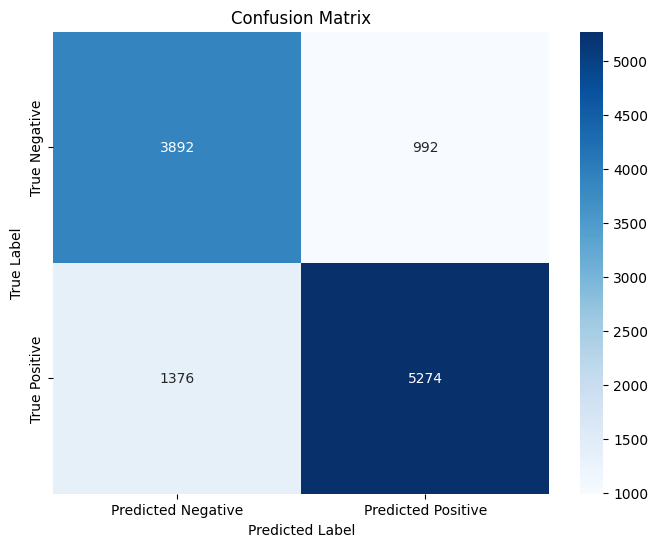

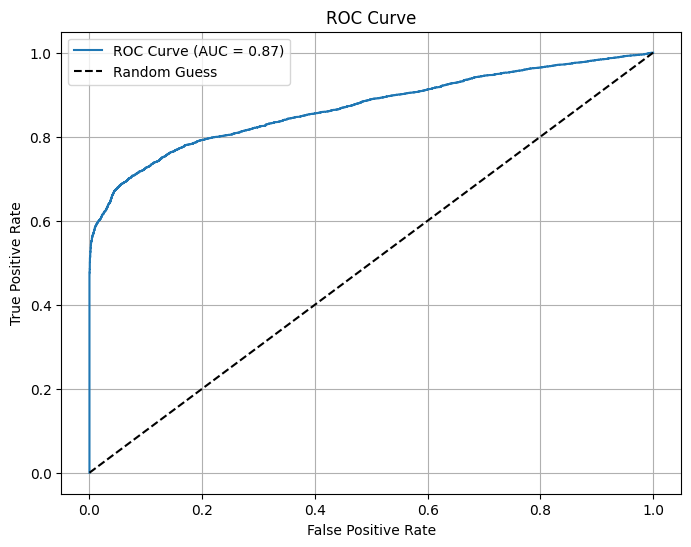

---------------------------------------------------------------------------
Evaluating dataset 7 for Logistic Regression
Accuracy: 0.7731
Precision: 0.7935
Recall: 0.8198
F1-Score: 0.8064
ROC-AUC: 0.8697


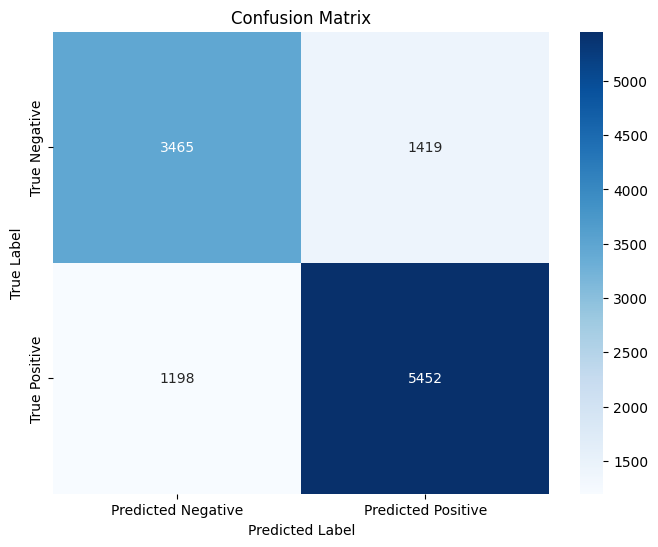

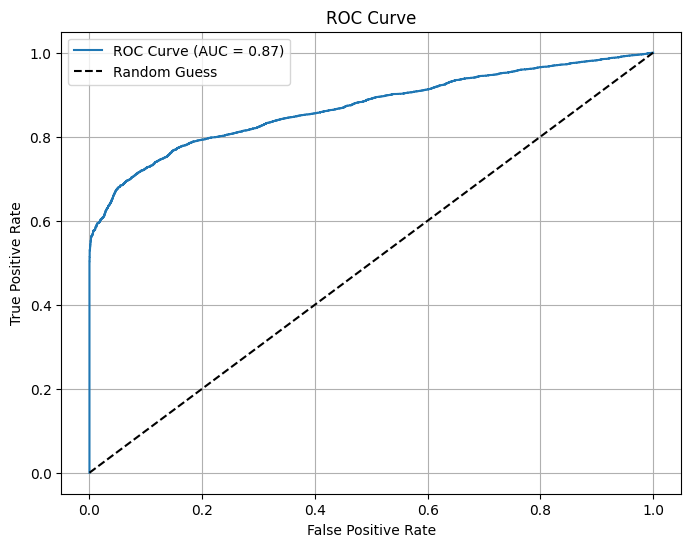

---------------------------------------------------------------------------
Evaluating dataset 8 for Logistic Regression
Accuracy: 0.7921
Precision: 0.8372
Recall: 0.7937
F1-Score: 0.8149
ROC-AUC: 0.8676


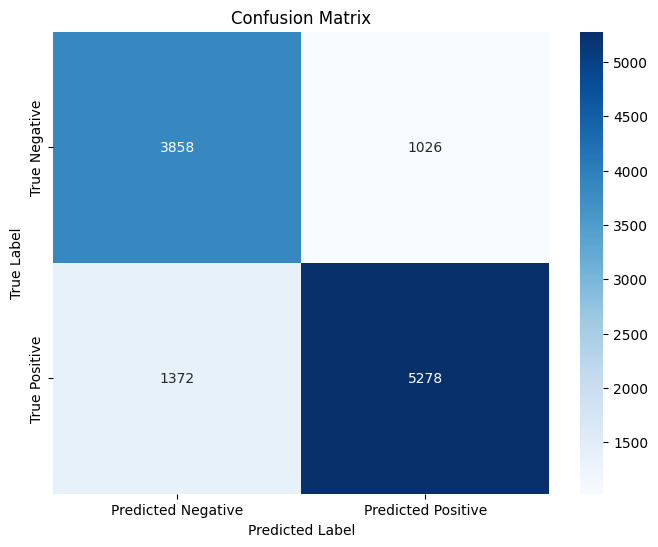

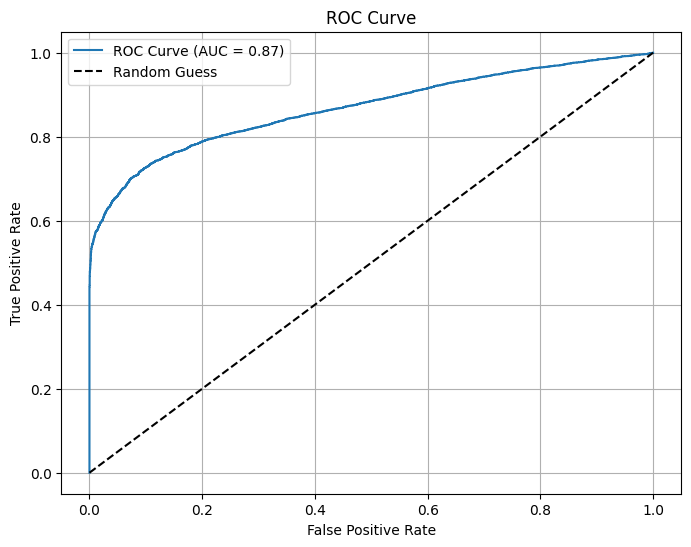

In [ ]:
# Evaluate Logistic Regression model
logistic_eval = []
for i in range(len(logistic_results)):
    print(f"Evaluating dataset {i+1} for Logistic Regression")
    y_pred, y_prob = logistic_results[i]
    y_true = datasets[i][3]
    logistic_eval.append(evaluation(y_pred, y_prob, y_true))
    if i < len(logistic_results) - 1:
        print("---------------------------------------------------------------------------")

In [ ]:
with open('/content/logistic_models/logistic_eval.pkl', 'wb') as f:
    pickle.dump(logistic_eval, f)

| Dataset | Accuracy   | Precision  | Recall     | F1-Score   | ROC-AUC    |
| ------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| 1       | 0.7732     | 0.7933     | **0.8203** | 0.8066     | 0.8696     |
| 2       | 0.7786     | 0.8139     | 0.7985     | 0.8061     | 0.8628     |
| 3       | 0.7732     | 0.7942     | 0.8188     | 0.8063     | 0.8698     |
| 4       | 0.7792     | 0.8145     | 0.7989     | 0.8066     | 0.8630     |
| 5       | 0.7728     | 0.7935     | 0.8192     | 0.8062     | **0.8699** |
| 6       | **0.7947** | **0.8417** | 0.7931     | **0.8167** | 0.8690     |
| 7       | 0.7731     | 0.7935     | 0.8198     | 0.8064     | 0.8697     |
| 8       | 0.7921     | 0.8372     | 0.7937     | 0.8149     | 0.8676     |


## Decision Tree

Evaluating dataset 1 for Decision Tree
Accuracy: 0.8117
Precision: 0.8289
Recall: 0.8486
F1-Score: 0.8386
ROC-AUC: 0.8050


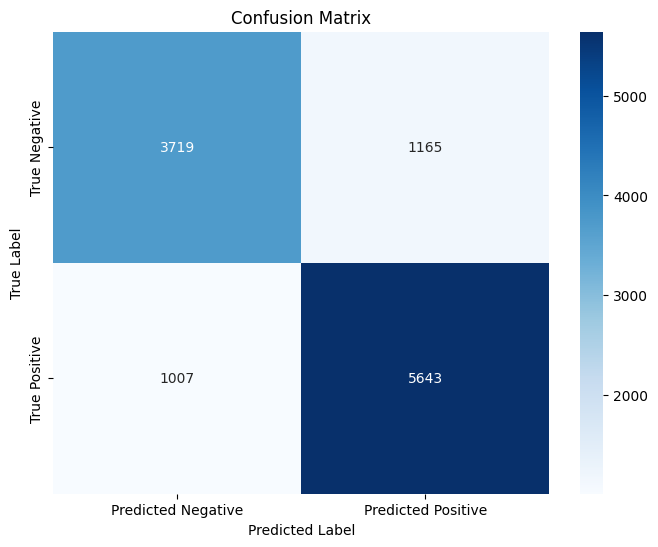

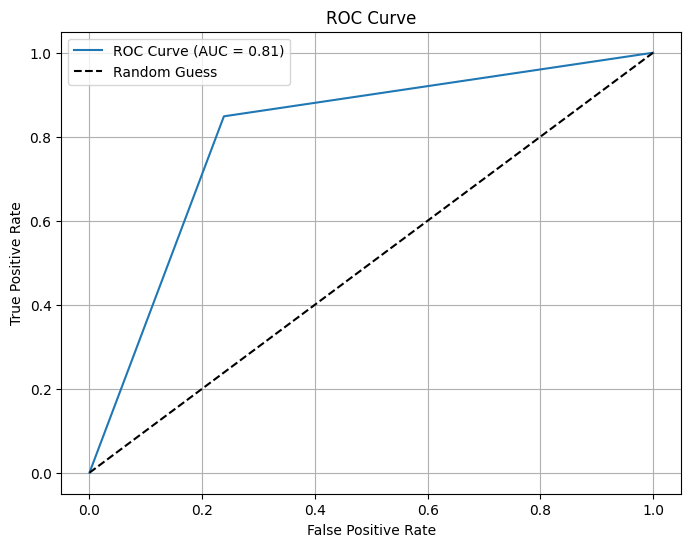

---------------------------------------------------------------------------
Evaluating dataset 2 for Decision Tree
Accuracy: 0.8151
Precision: 0.8331
Recall: 0.8495
F1-Score: 0.8412
ROC-AUC: 0.8088


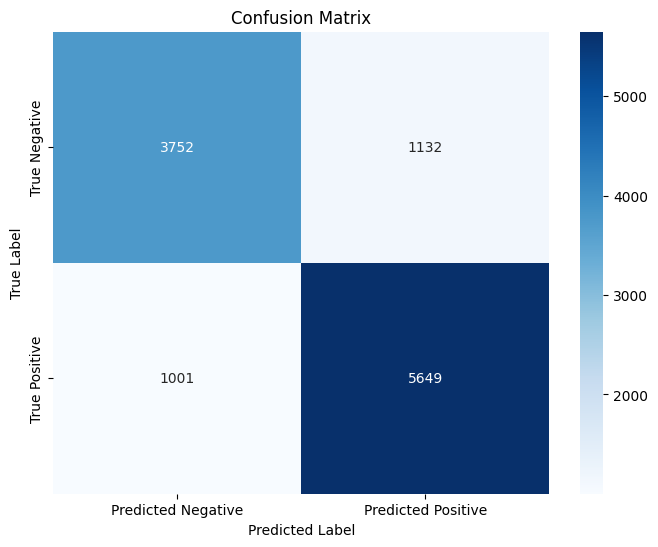

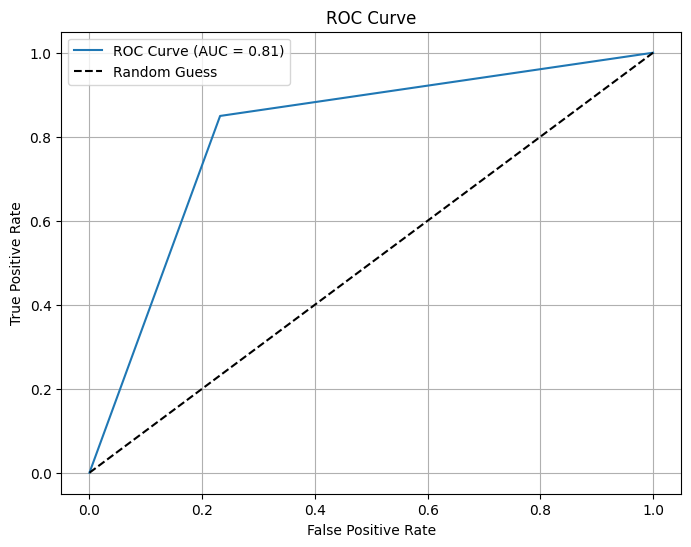

---------------------------------------------------------------------------
Evaluating dataset 3 for Decision Tree
Accuracy: 0.8204
Precision: 0.8439
Recall: 0.8448
F1-Score: 0.8444
ROC-AUC: 0.8167


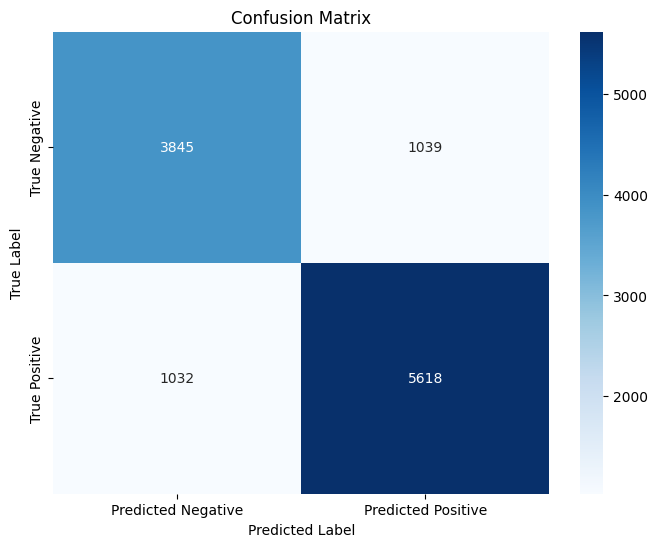

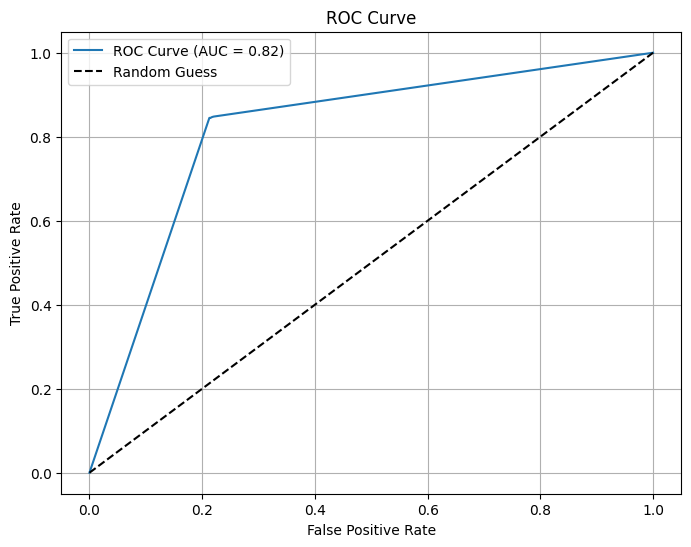

---------------------------------------------------------------------------
Evaluating dataset 4 for Decision Tree
Accuracy: 0.8147
Precision: 0.8344
Recall: 0.8466
F1-Score: 0.8405
ROC-AUC: 0.8090


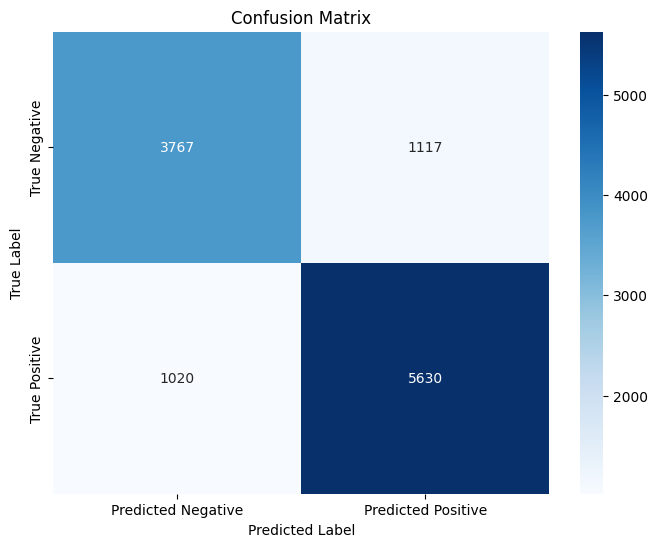

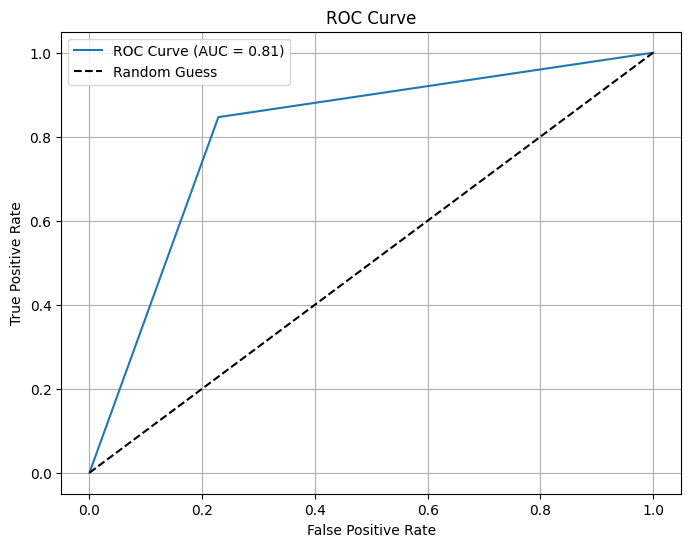

---------------------------------------------------------------------------
Evaluating dataset 5 for Decision Tree
Accuracy: 0.8174
Precision: 0.8428
Recall: 0.8400
F1-Score: 0.8414
ROC-AUC: 0.8140


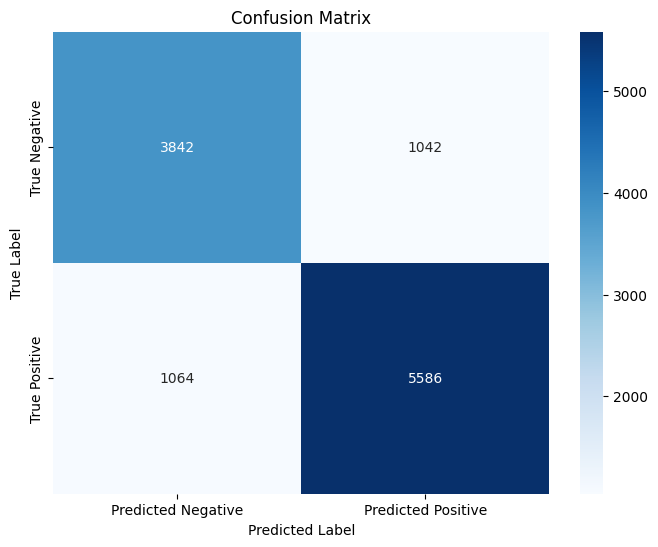

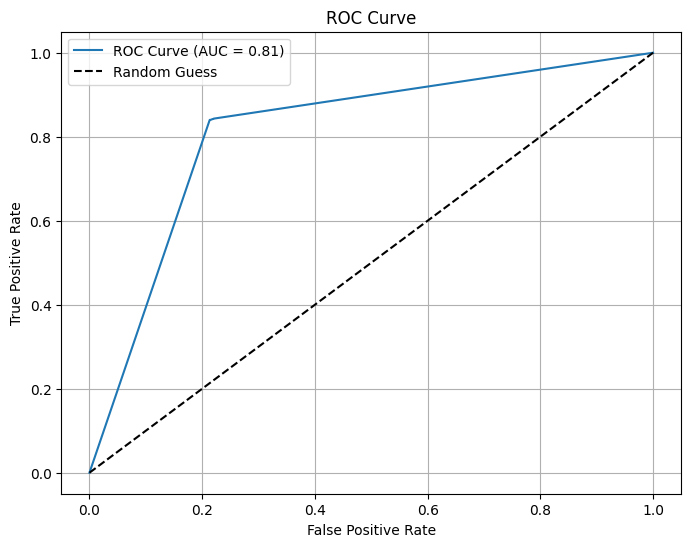

---------------------------------------------------------------------------
Evaluating dataset 6 for Decision Tree
Accuracy: 0.8148
Precision: 0.8307
Recall: 0.8525
F1-Score: 0.8415
ROC-AUC: 0.8080


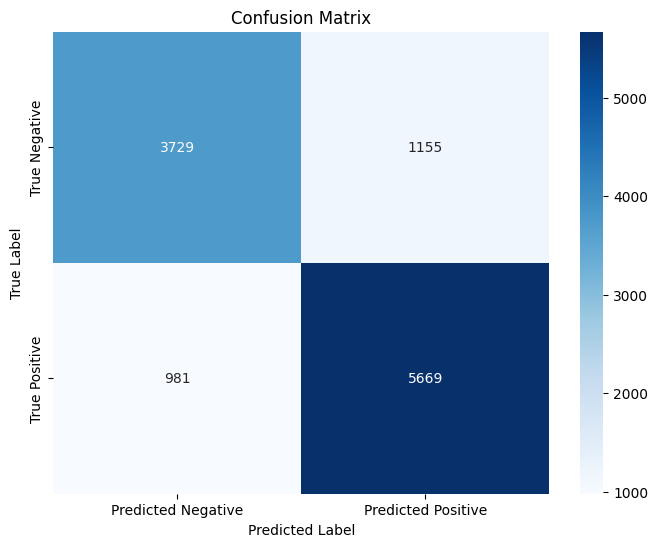

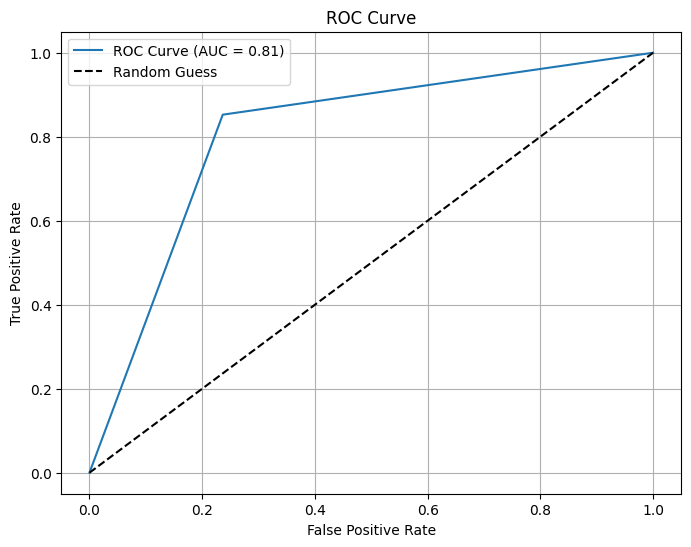

---------------------------------------------------------------------------
Evaluating dataset 7 for Decision Tree
Accuracy: 0.6768
Precision: 0.7157
Recall: 0.7289
F1-Score: 0.7222
ROC-AUC: 0.6674


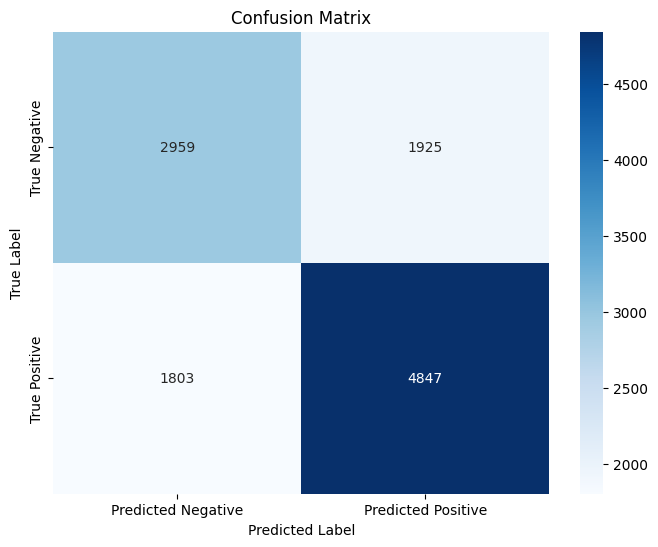

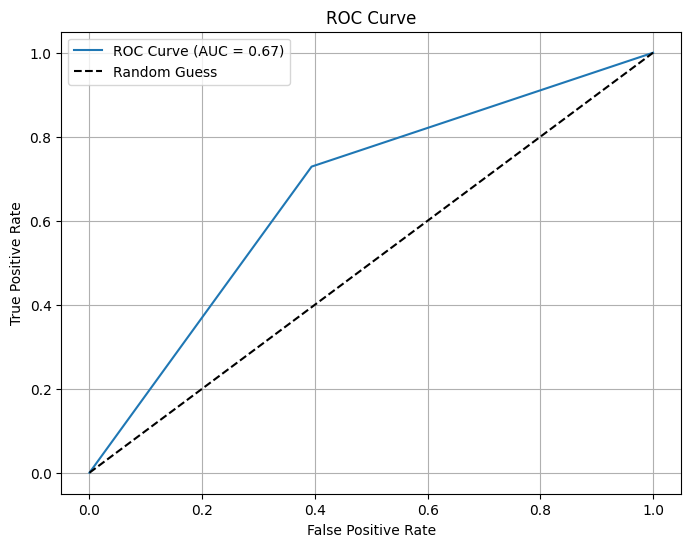

---------------------------------------------------------------------------
Evaluating dataset 8 for Decision Tree
Accuracy: 0.7148
Precision: 0.7542
Recall: 0.7498
F1-Score: 0.7520
ROC-AUC: 0.7085


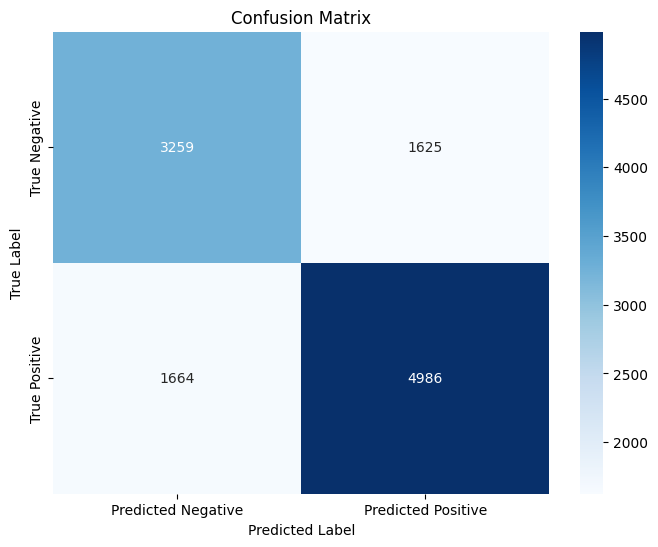

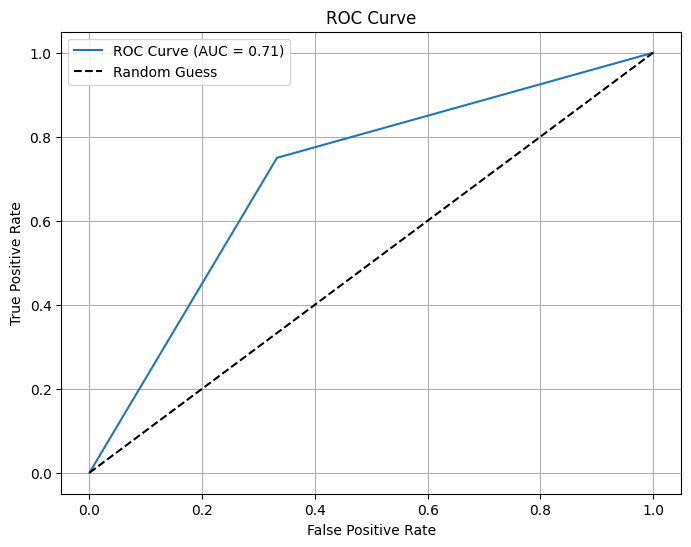

In [ ]:
# Evaluate Decision Tree model
dt_eval = []
for i in range(len(tree_results)):
  print(f"Evaluating dataset {i+1} for Decision Tree")
  dt_eval.append(evaluation(tree_results[i][0], tree_results[i][1], datasets[i][3]))
  if i < len(tree_results) - 1:
      print("---------------------------------------------------------------------------")

In [ ]:
with open('/content/tree_models/dt_eval.pkl', 'wb') as f:
    pickle.dump(dt_eval, f)

| Dataset | Accuracy   | Precision  | Recall     | F1-Score   | ROC-AUC    |
| ------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| 1       | 0.8117     | 0.8289     | 0.8486     | 0.8386     | 0.8050     |
| 2       | 0.8151     | 0.8331     | 0.8495     | 0.8412     | 0.8088     |
| 3       | **0.8204** | **0.8439** | 0.8448     | **0.8444** | **0.8167** |
| 4       | 0.8147     | 0.8344     | 0.8466     | 0.8405     | 0.8090     |
| 5       | 0.8174     | 0.8428     | 0.8400     | 0.8414     | 0.8140     |
| 6       | 0.8148     | 0.8307     | **0.8525** | 0.8415     | 0.8080     |
| 7       | 0.6768     | 0.7157     | 0.7289     | 0.7222     | 0.6674     |
| 8       | 0.7148     | 0.7542     | 0.7498     | 0.7520     | 0.7085     |


## Random Forest

Evaluating dataset 1 for Random Forest
Accuracy: 0.8857
Precision: 0.9993
Recall: 0.8024
F1-Score: 0.8901
ROC-AUC: 0.9019


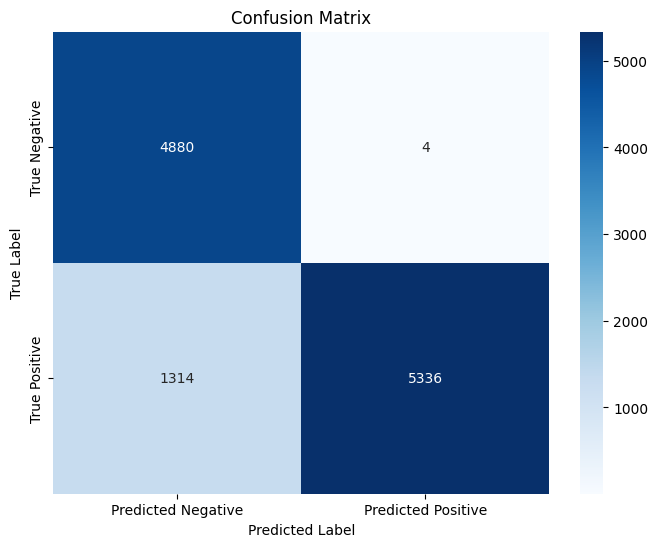

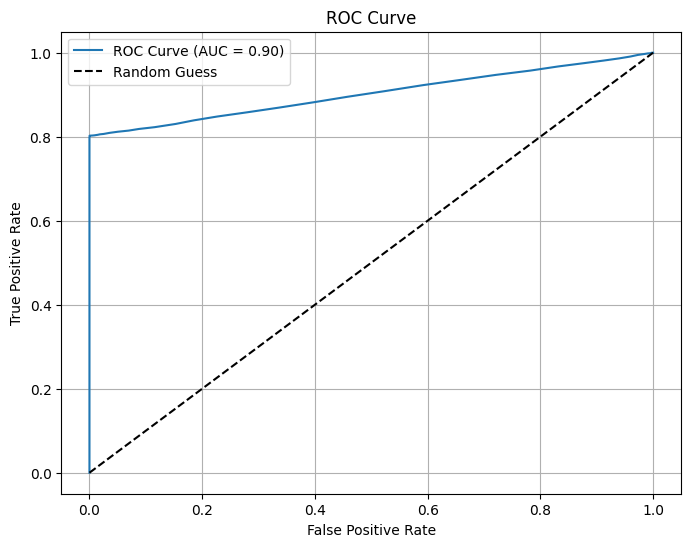

---------------------------------------------------------------------------
Evaluating dataset 2 for Random Forest
Accuracy: 0.8856
Precision: 0.9989
Recall: 0.8024
F1-Score: 0.8899
ROC-AUC: 0.9020


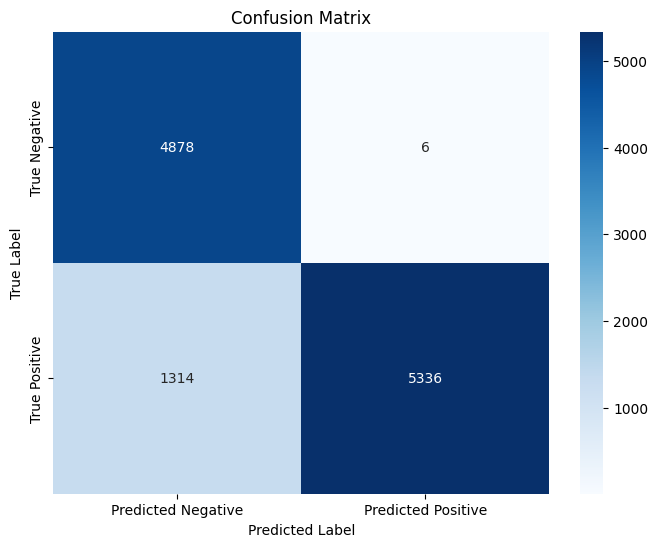

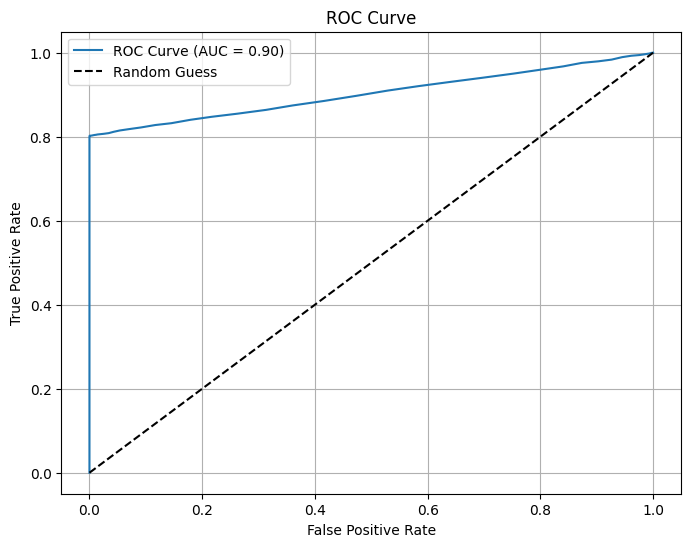

---------------------------------------------------------------------------
Evaluating dataset 3 for Random Forest
Accuracy: 0.8216
Precision: 0.8469
Recall: 0.8429
F1-Score: 0.8449
ROC-AUC: 0.9024


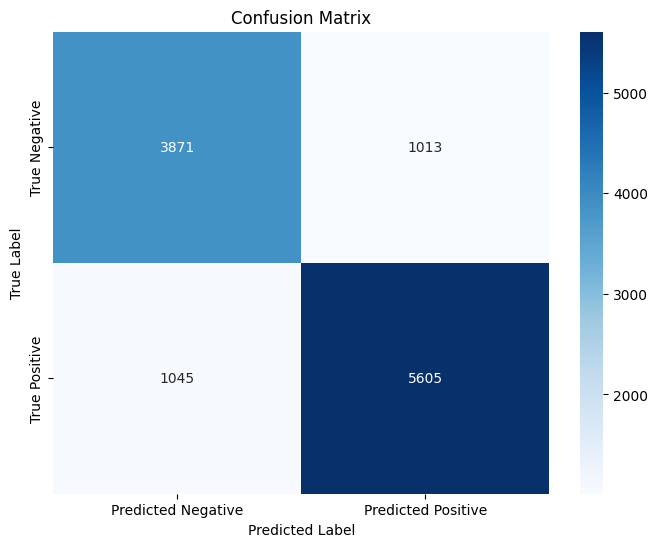

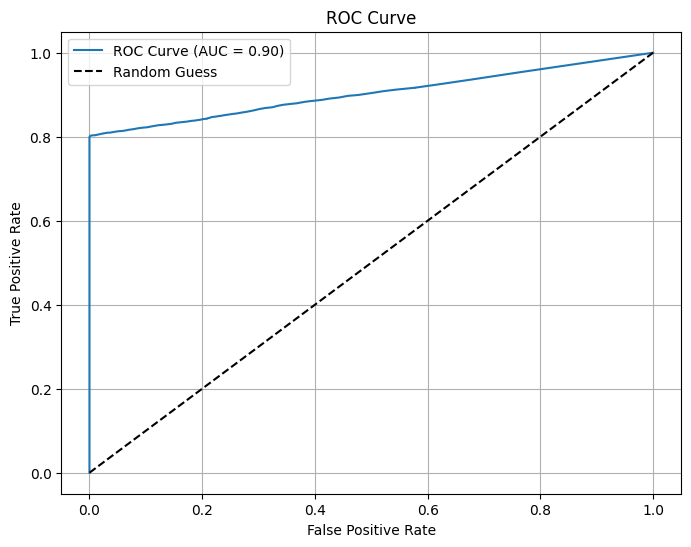

---------------------------------------------------------------------------
Evaluating dataset 4 for Random Forest
Accuracy: 0.8660
Precision: 0.9429
Recall: 0.8171
F1-Score: 0.8755
ROC-AUC: 0.8993


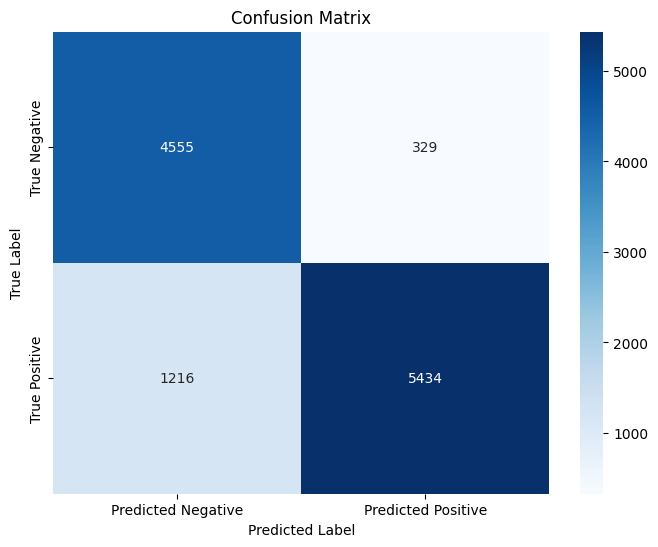

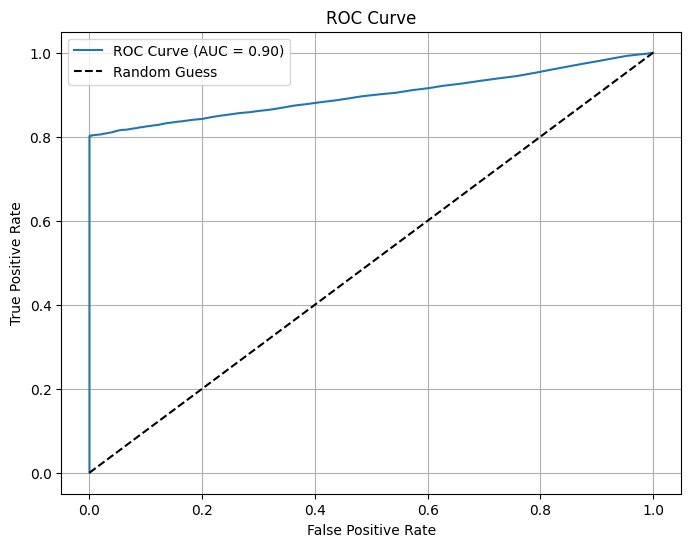

---------------------------------------------------------------------------
Evaluating dataset 5 for Random Forest
Accuracy: 0.8177
Precision: 0.8434
Recall: 0.8397
F1-Score: 0.8415
ROC-AUC: 0.8992


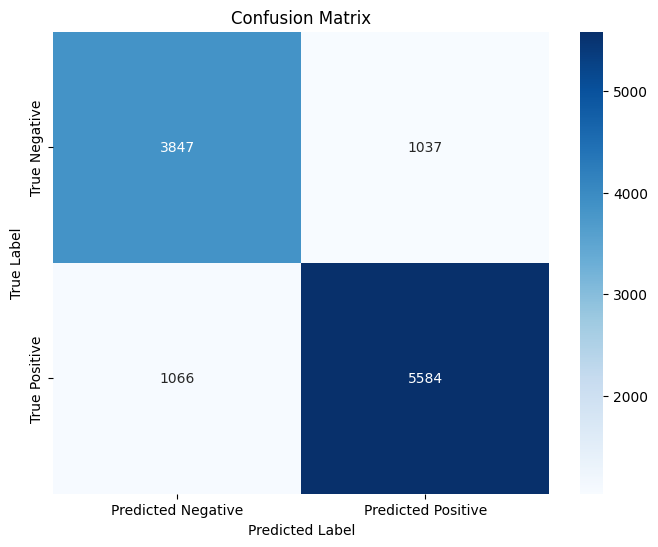

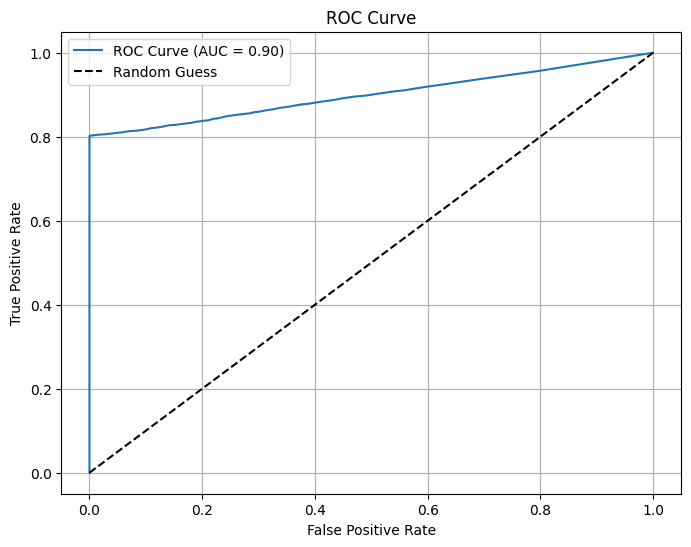

---------------------------------------------------------------------------
Evaluating dataset 6 for Random Forest
Accuracy: 0.8856
Precision: 0.9989
Recall: 0.8024
F1-Score: 0.8899
ROC-AUC: 0.8994


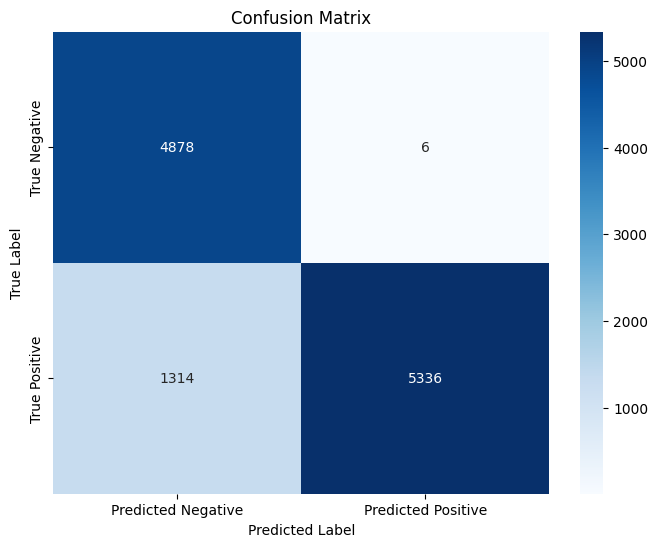

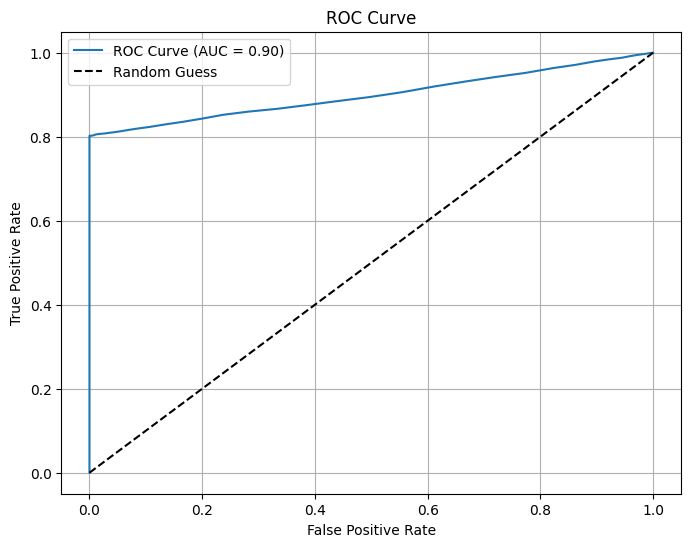

---------------------------------------------------------------------------
Evaluating dataset 7 for Random Forest
Accuracy: 0.7795
Precision: 0.8039
Recall: 0.8168
F1-Score: 0.8103
ROC-AUC: 0.8617


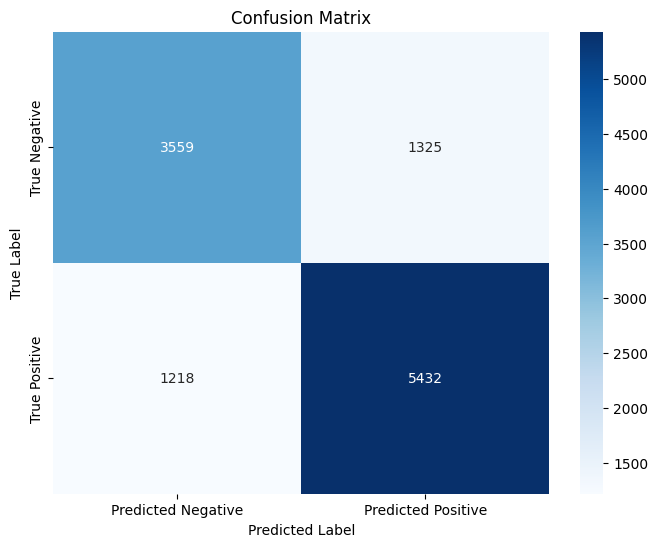

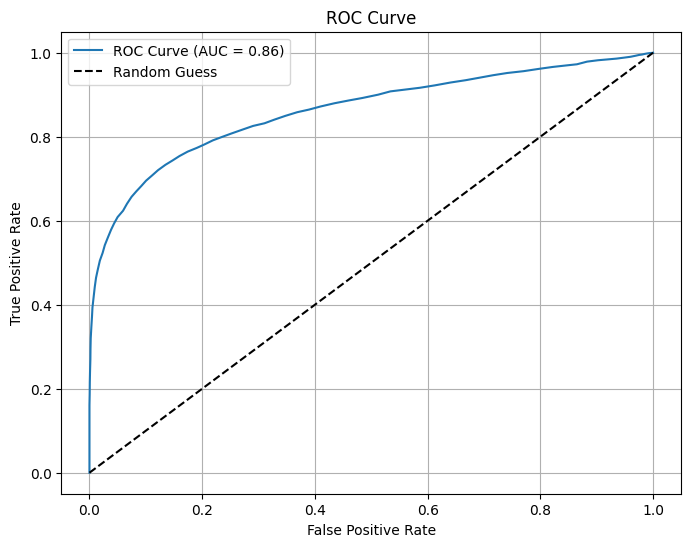

---------------------------------------------------------------------------
Evaluating dataset 8 for Random Forest
Accuracy: 0.8063
Precision: 0.8679
Recall: 0.7833
F1-Score: 0.8234
ROC-AUC: 0.8777


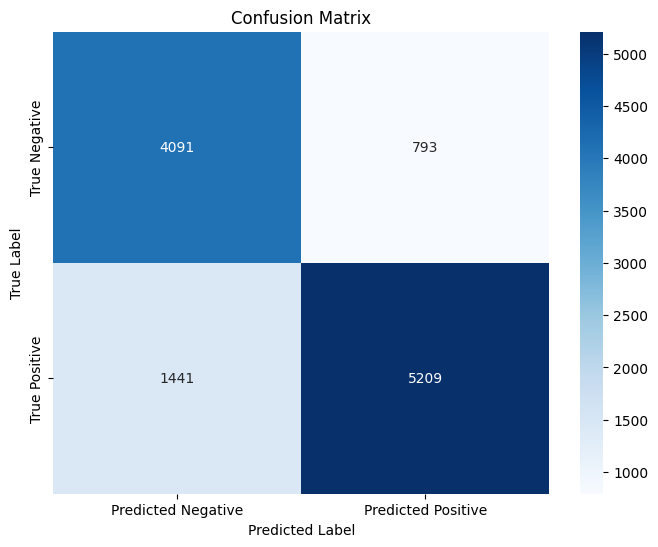

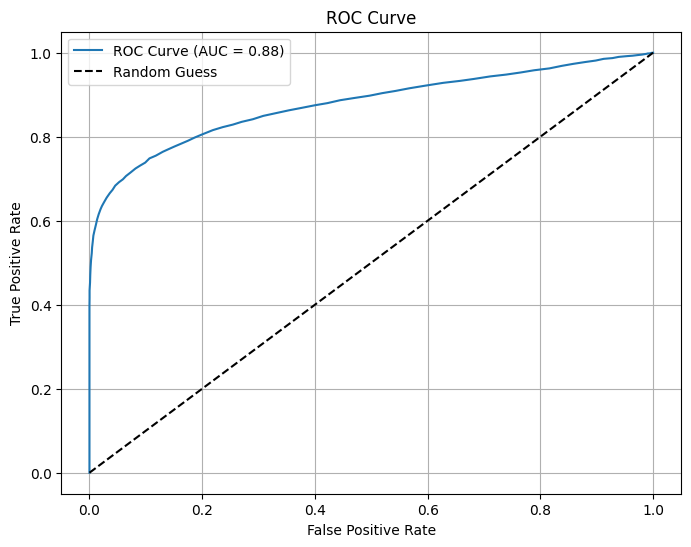

In [ ]:
# Evaluate Random Forest model
rf_eval = []
for i in range(len(rf_results)):
  print(f"Evaluating dataset {i+1} for Random Forest")
  rf_eval.append(evaluation(rf_results[i][0], rf_results[i][1], datasets[i][3]))
  if i < len(rf_results) - 1:
      print("---------------------------------------------------------------------------")

In [ ]:
with open('/content/rf_models/rf_eval.pkl', 'wb') as f:
    pickle.dump(rf_eval, f)

| Dataset | Accuracy   | Precision  | Recall     | F1-Score   | ROC-AUC    |
| ------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| 1       | **0.8857** | **0.9993** | 0.8024     | **0.8901** | 0.9019     |
| 2       | 0.8856     | 0.9989     | 0.8024     | 0.8899     | 0.9020     |
| 3       | 0.8216     | 0.8469     | **0.8429** | 0.8449     | **0.9024** |
| 4       | 0.8660     | 0.9429     | 0.8171     | 0.8755     | 0.8993     |
| 5       | 0.8177     | 0.8434     | 0.8397     | 0.8415     | 0.8992     |
| 6       | 0.8856     | 0.9989     | 0.8024     | 0.8899     | 0.8994     |
| 7       | 0.7795     | 0.8039     | 0.8168     | 0.8103     | 0.8617     |
| 8       | 0.8063     | 0.8679     | 0.7833     | 0.8234     | 0.8777     |


## SVM

Evaluating dataset 1 for SVM
Accuracy: 0.8477
Precision: 0.9055
Recall: 0.8215
F1-Score: 0.8615
ROC-AUC: 0.8981


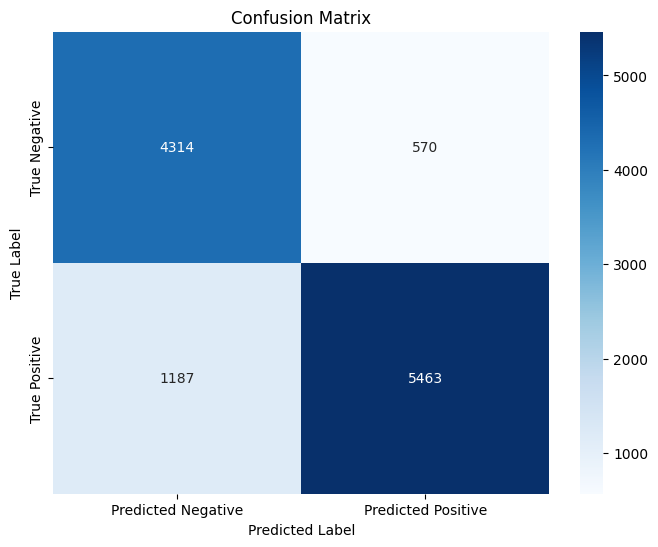

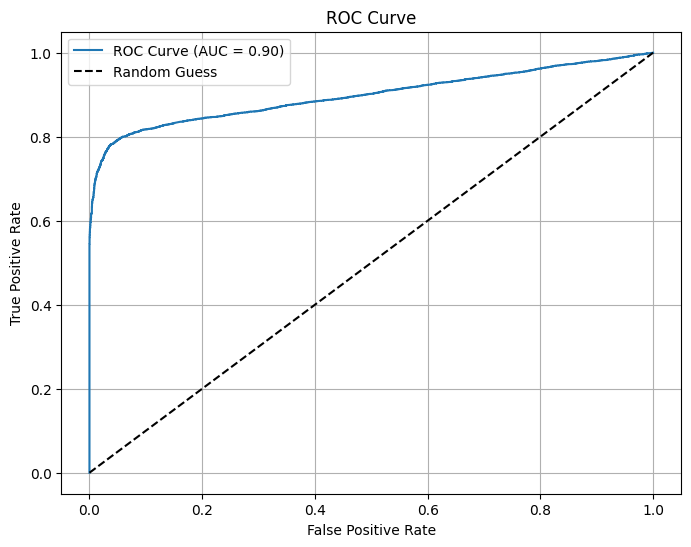

---------------------------------------------------------------------------
Evaluating dataset 2 for SVM
Accuracy: 0.8520
Precision: 0.9194
Recall: 0.8147
F1-Score: 0.8639
ROC-AUC: 0.8969


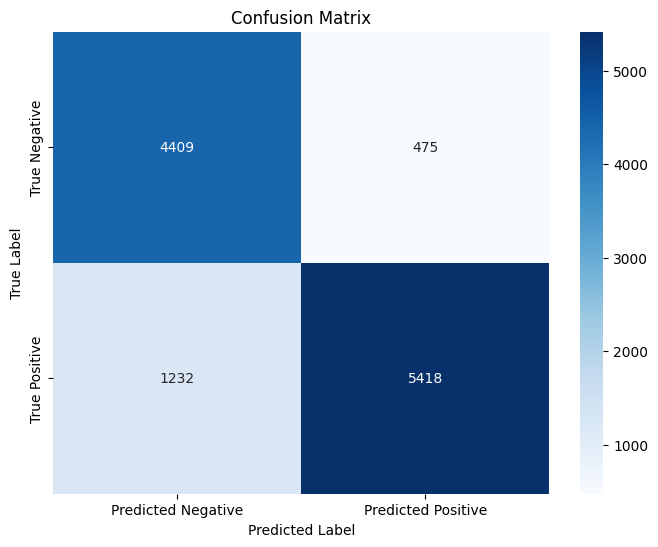

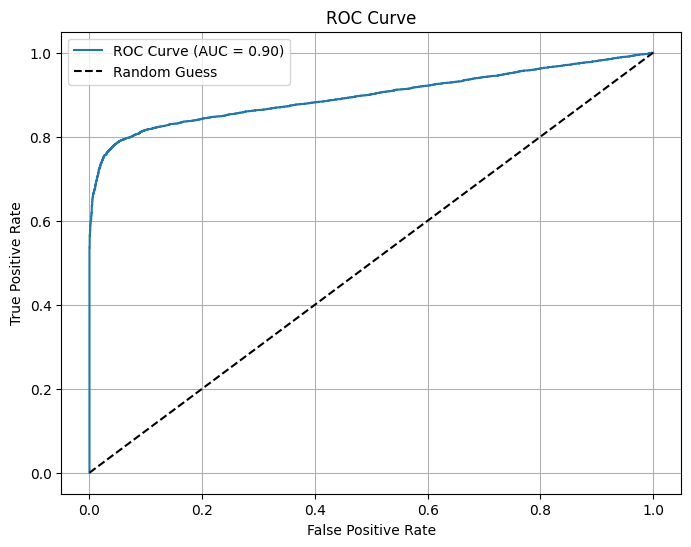

---------------------------------------------------------------------------
Evaluating dataset 3 for SVM
Accuracy: 0.8803
Precision: 0.9821
Recall: 0.8071
F1-Score: 0.8860
ROC-AUC: 0.8975


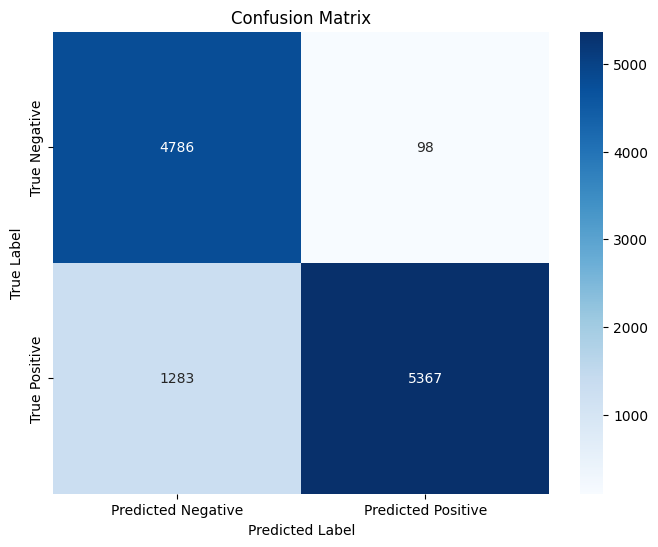

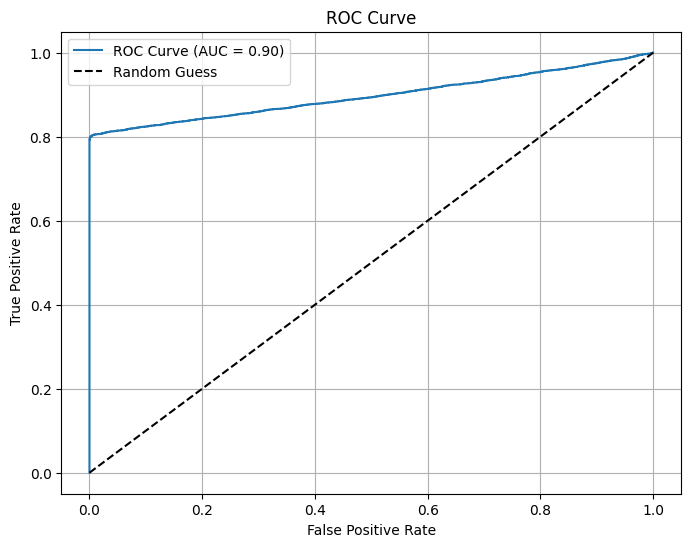

---------------------------------------------------------------------------
Evaluating dataset 4 for SVM
Accuracy: 0.8745
Precision: 0.9690
Recall: 0.8081
F1-Score: 0.8813
ROC-AUC: 0.8988


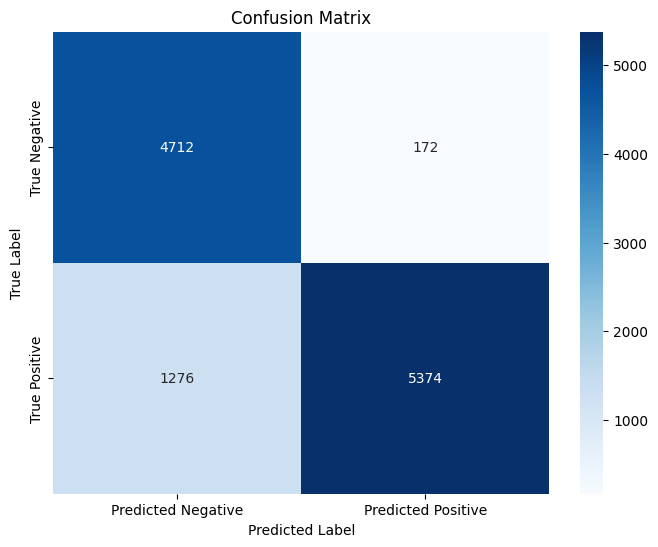

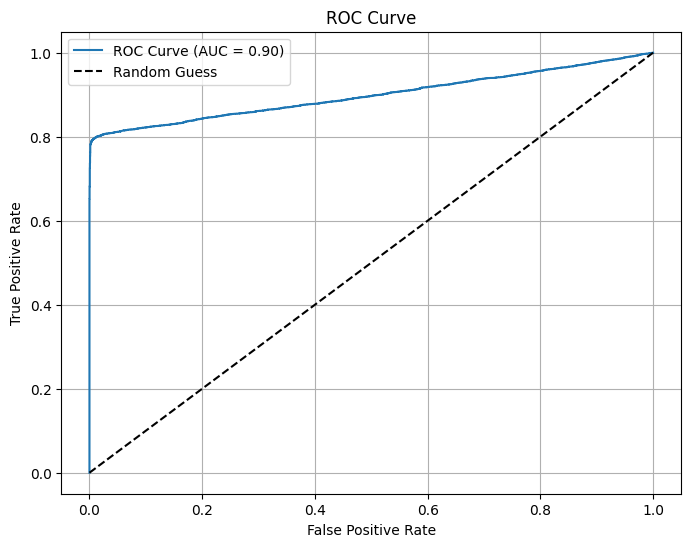

---------------------------------------------------------------------------
Evaluating dataset 5 for SVM
Accuracy: 0.8796
Precision: 0.9799
Recall: 0.8077
F1-Score: 0.8855
ROC-AUC: 0.8967


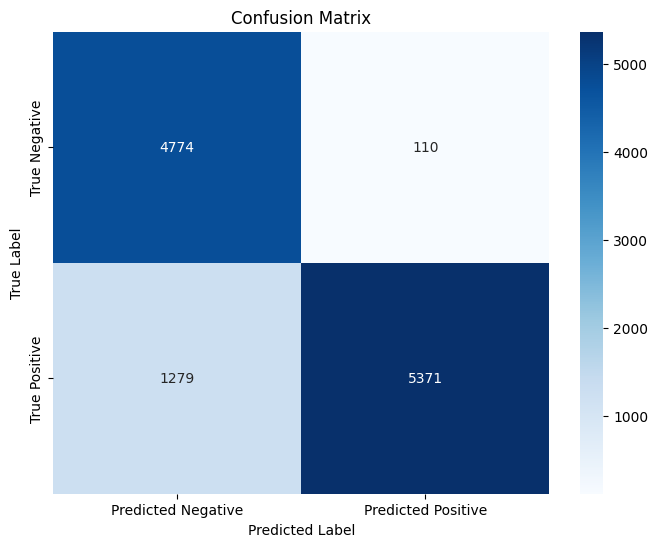

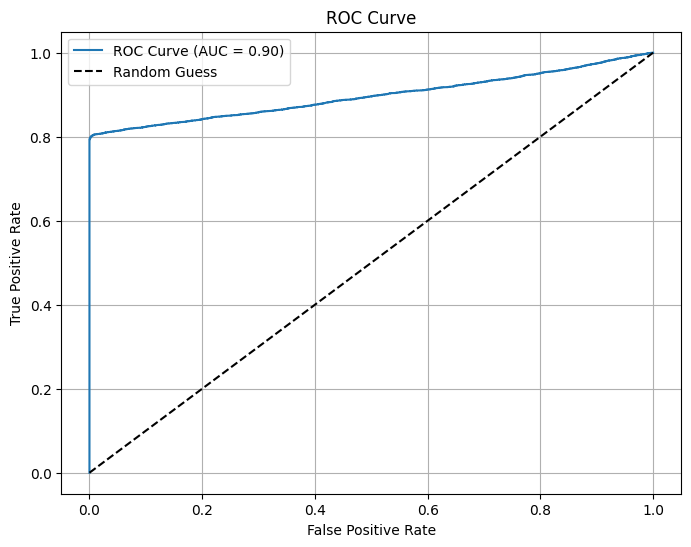

---------------------------------------------------------------------------
Evaluating dataset 6 for SVM
Accuracy: 0.8589
Precision: 0.9356
Recall: 0.8110
F1-Score: 0.8689
ROC-AUC: 0.8982


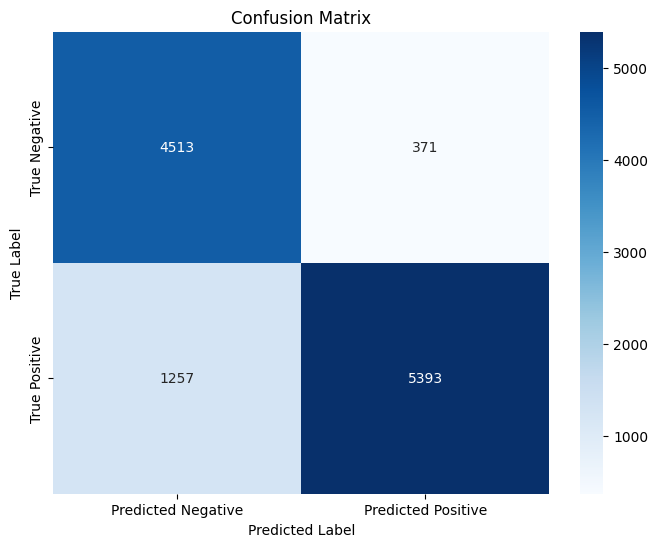

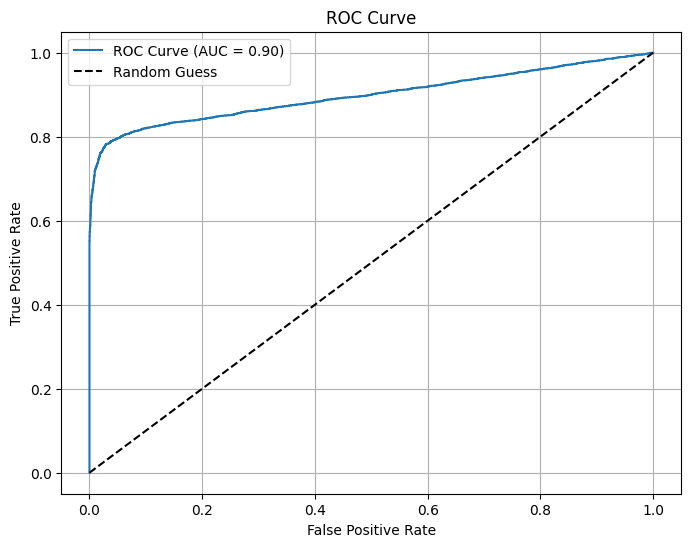

---------------------------------------------------------------------------
Evaluating dataset 7 for SVM
Accuracy: 0.8504
Precision: 0.9099
Recall: 0.8218
F1-Score: 0.8636
ROC-AUC: 0.8985


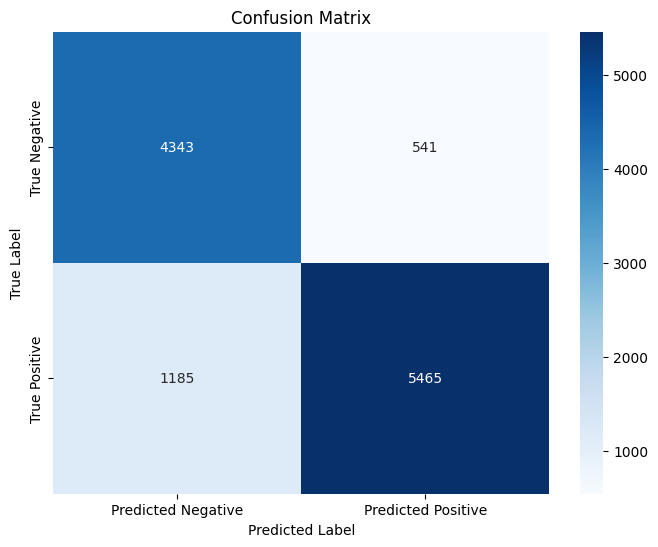

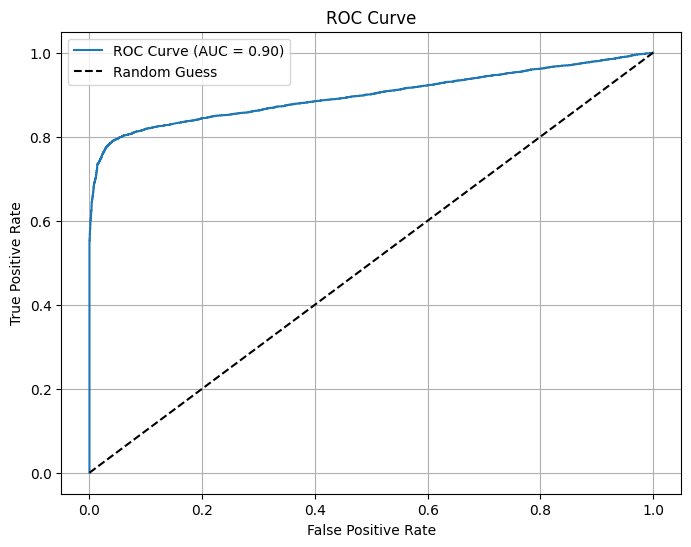

---------------------------------------------------------------------------
Evaluating dataset 8 for SVM
Accuracy: 0.8550
Precision: 0.9252
Recall: 0.8143
F1-Score: 0.8662
ROC-AUC: 0.8973


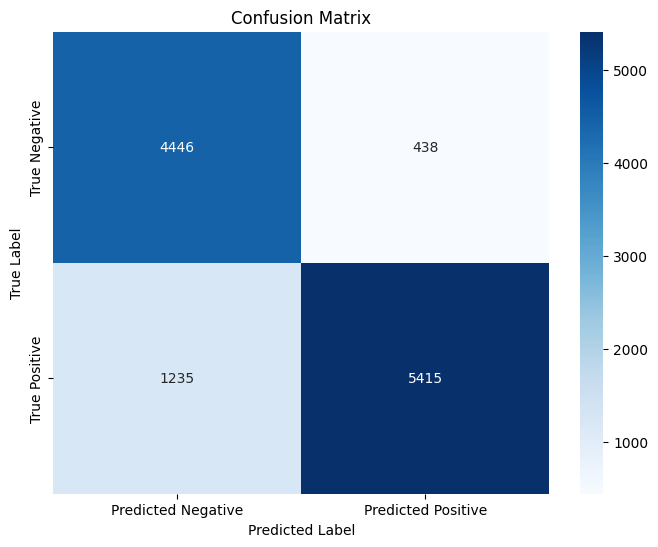

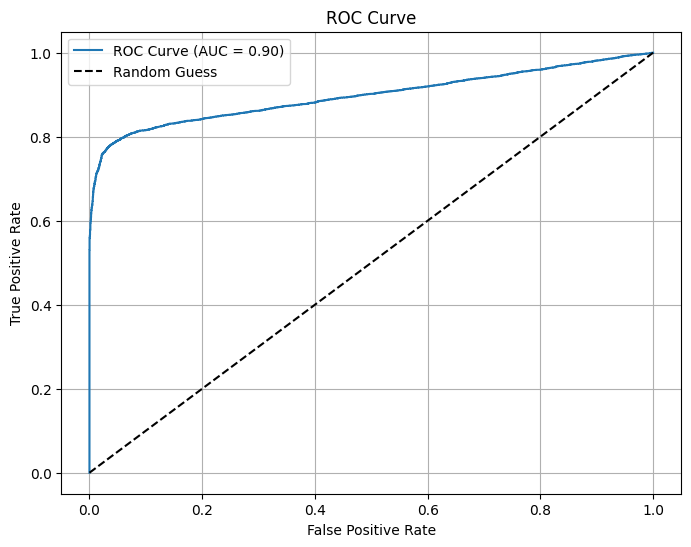

In [ ]:
# Evaluate SVM model
svm_eval = []
for i in range(len(svm_results)):
  print(f"Evaluating dataset {i+1} for SVM")
  svm_eval.append(evaluation(svm_results[i][0], svm_results[i][1], datasets[i][3]))
  if i < len(svm_results) - 1:
      print("---------------------------------------------------------------------------")

In [ ]:
with open('/content/svm_models/svm_eval.pkl', 'wb') as f:
    pickle.dump(svm_eval, f)

| Dataset | Accuracy   | Precision  | Recall     | F1-Score   | ROC-AUC    |
| ------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| 1       | 0.8477     | 0.9055     | 0.8215 | 0.8615     | 0.8981     |
| 2       | 0.8520     | 0.9194     | 0.8147     | 0.8639     | 0.8969     |
| 3       | **0.8803** | **0.9821** | 0.8071     | **0.8860** | 0.8975     |
| 4       | 0.8745     | 0.9690     | 0.8081     | 0.8813     | **0.8988** |
| 5       | 0.8796     | 0.9799     | 0.8077     | 0.8855     | 0.8967     |
| 6       | 0.8589     | 0.9356     | 0.8110     | 0.8689     | 0.8982     |
| 7       | 0.8504     | 0.9099     | **0.8218** | 0.8636     | 0.8985     |
| 8       | 0.8550     | 0.9252     | 0.8143     | 0.8662     | 0.8973     |


## XGBoost

Evaluating dataset 1 for XGBoost
Accuracy: 0.8780
Precision: 0.9765
Recall: 0.8078
F1-Score: 0.8842
ROC-AUC: 0.9033


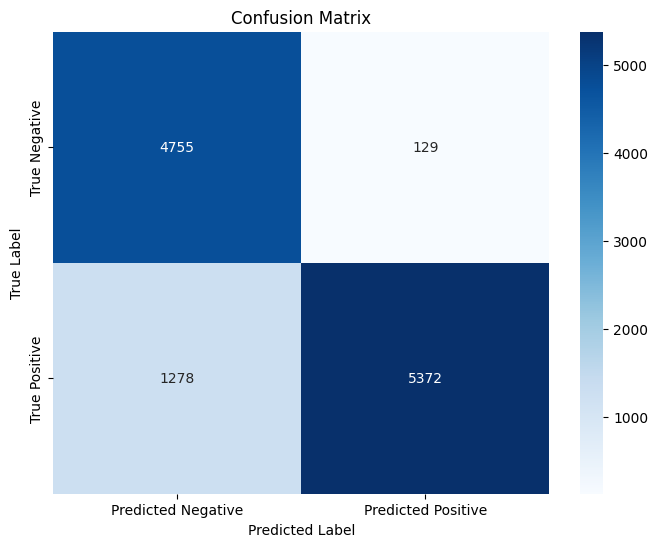

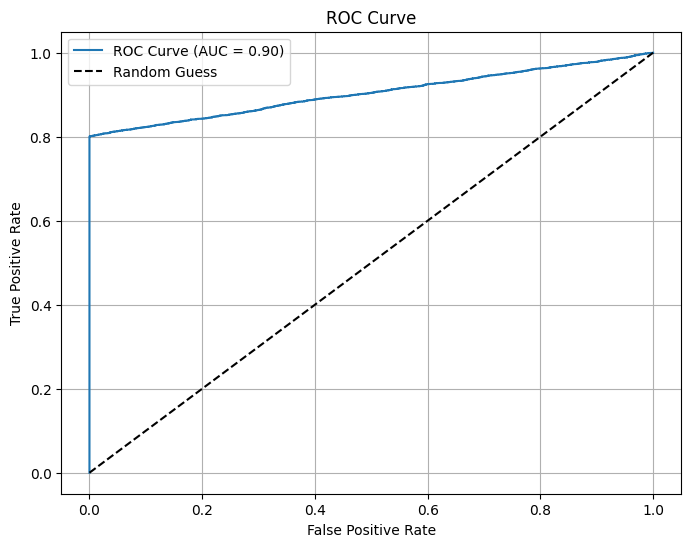

---------------------------------------------------------------------------
Evaluating dataset 2 for XGBoost
Accuracy: 0.8778
Precision: 0.9771
Recall: 0.8071
F1-Score: 0.8840
ROC-AUC: 0.9019


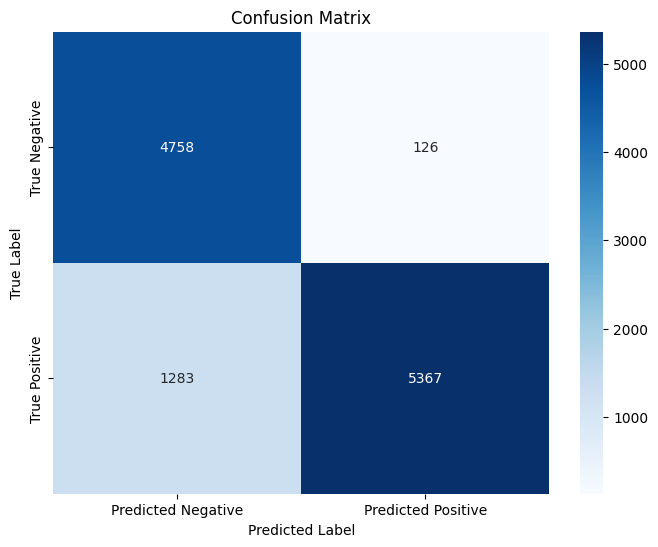

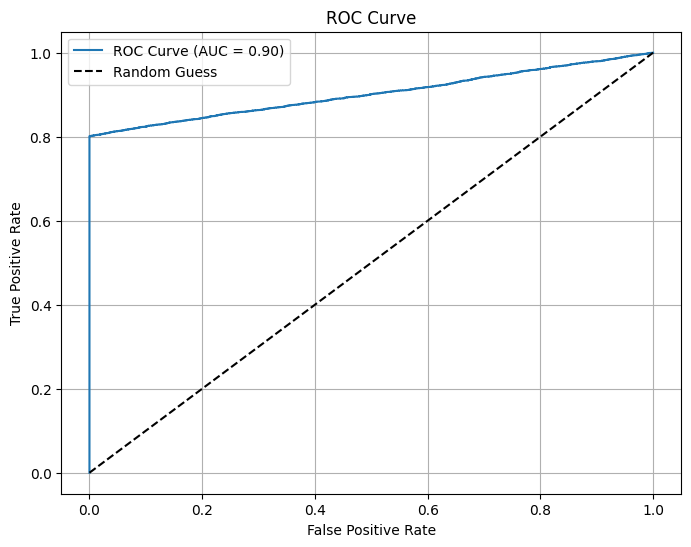

---------------------------------------------------------------------------
Evaluating dataset 3 for XGBoost
Accuracy: 0.8838
Precision: 0.9942
Recall: 0.8032
F1-Score: 0.8885
ROC-AUC: 0.9013


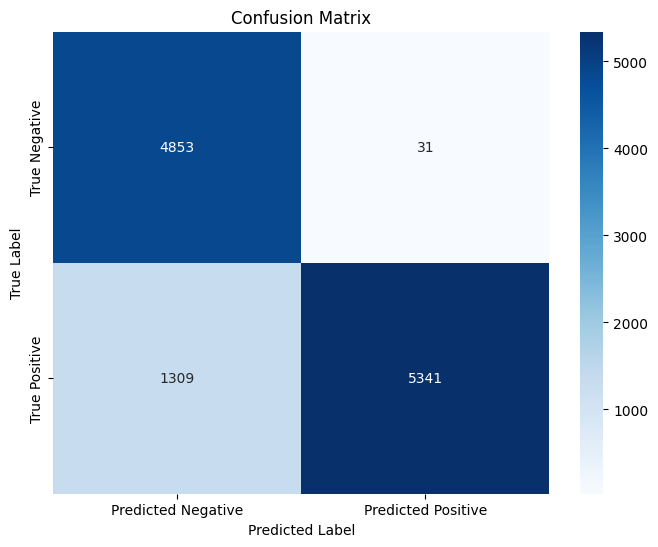

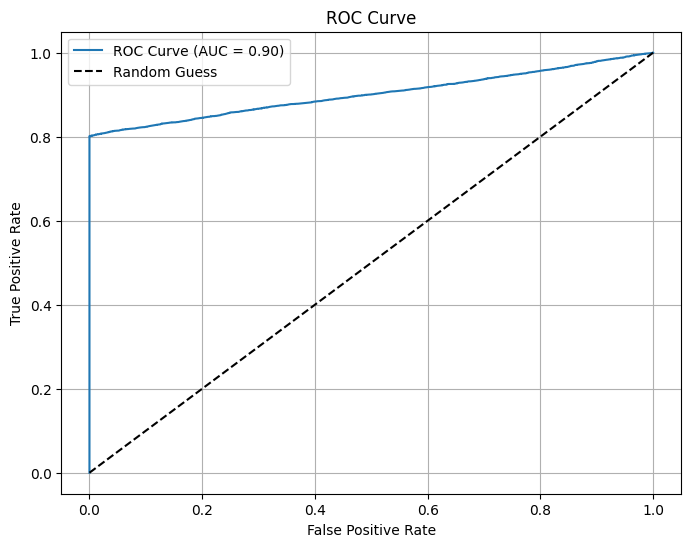

---------------------------------------------------------------------------
Evaluating dataset 4 for XGBoost
Accuracy: 0.8804
Precision: 0.9835
Recall: 0.8062
F1-Score: 0.8860
ROC-AUC: 0.9016


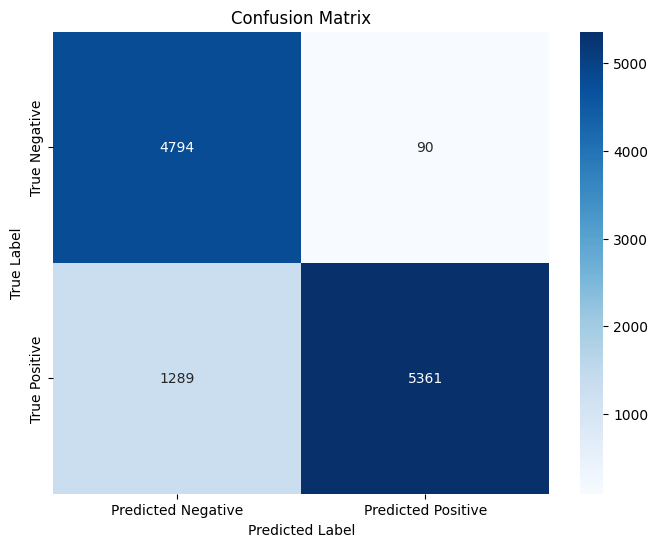

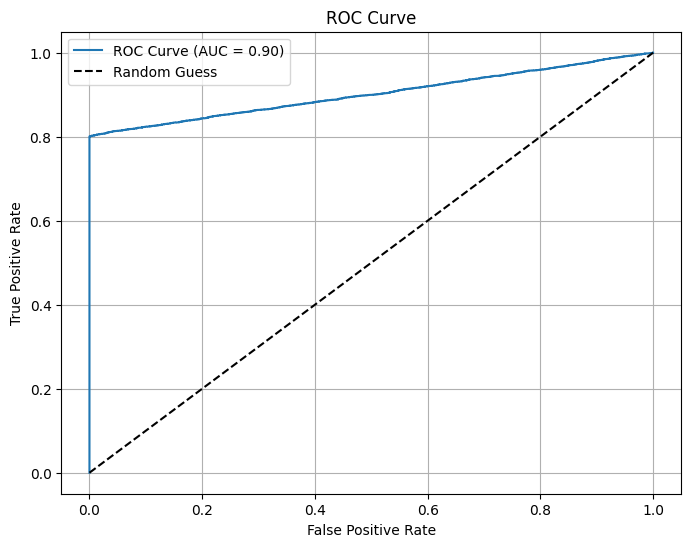

---------------------------------------------------------------------------
Evaluating dataset 5 for XGBoost
Accuracy: 0.8834
Precision: 0.9935
Recall: 0.8030
F1-Score: 0.8881
ROC-AUC: 0.9028


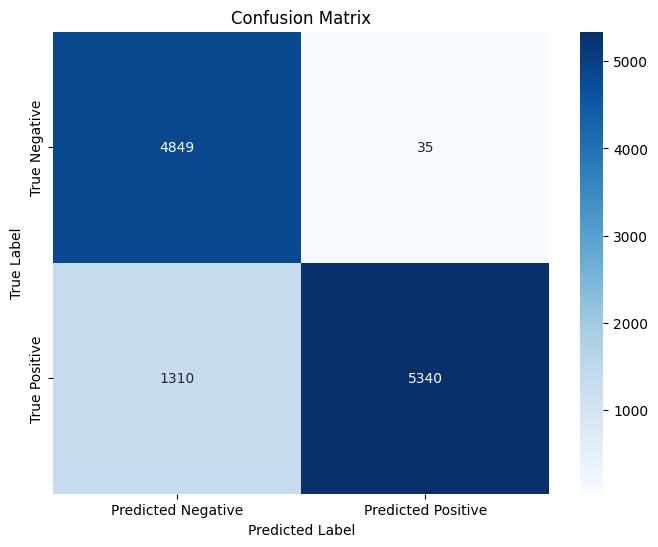

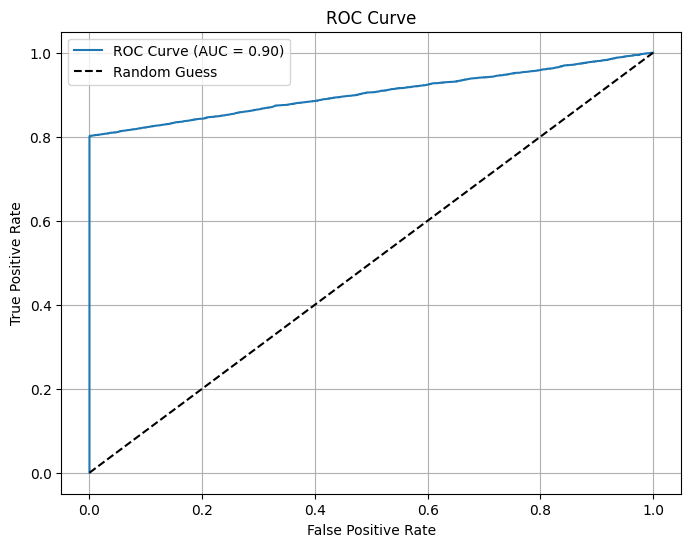

---------------------------------------------------------------------------
Evaluating dataset 6 for XGBoost
Accuracy: 0.8784
Precision: 0.9794
Recall: 0.8062
F1-Score: 0.8844
ROC-AUC: 0.9039


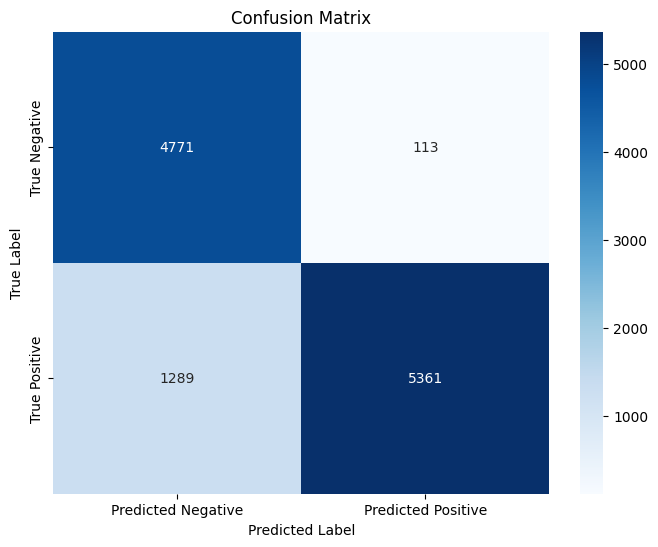

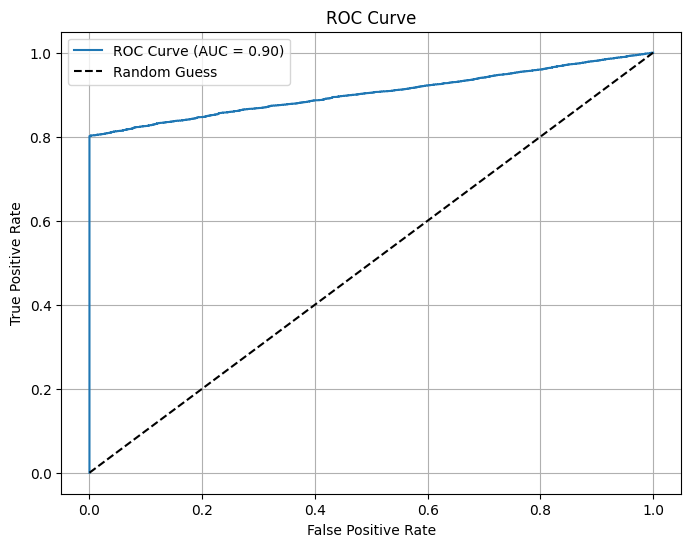

---------------------------------------------------------------------------
Evaluating dataset 7 for XGBoost
Accuracy: 0.7891
Precision: 0.8184
Recall: 0.8152
F1-Score: 0.8168
ROC-AUC: 0.8708


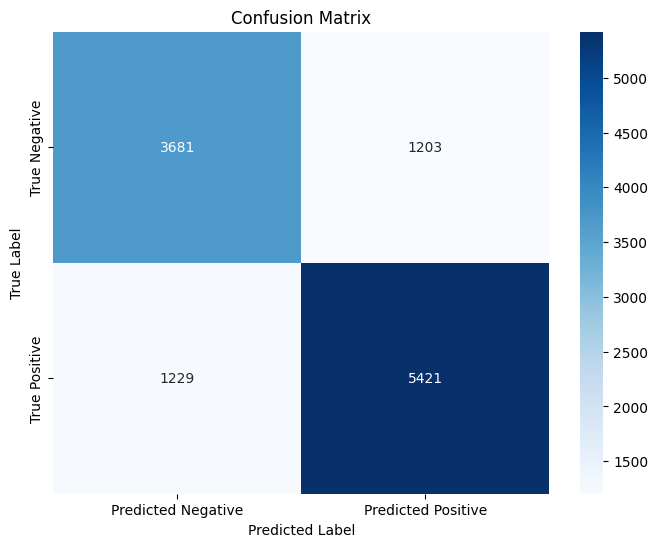

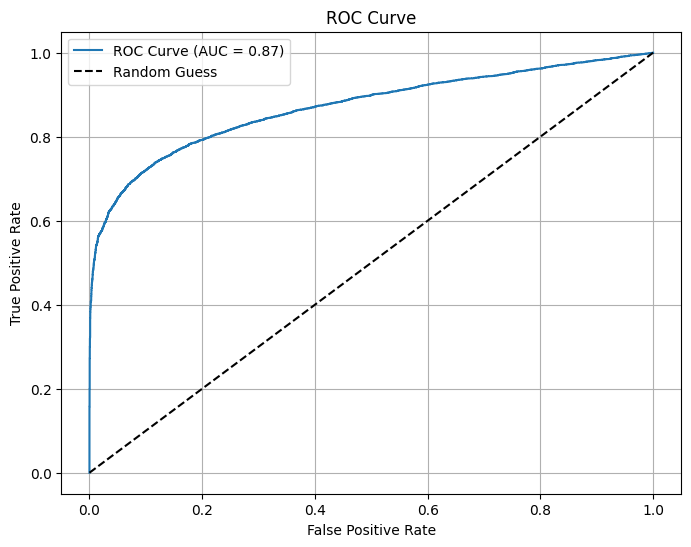

---------------------------------------------------------------------------
Evaluating dataset 8 for XGBoost
Accuracy: 0.8165
Precision: 0.8648
Recall: 0.8080
F1-Score: 0.8354
ROC-AUC: 0.8828


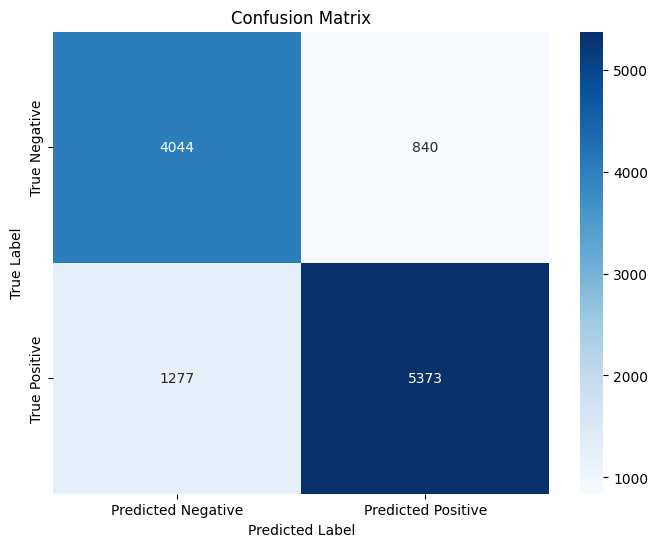

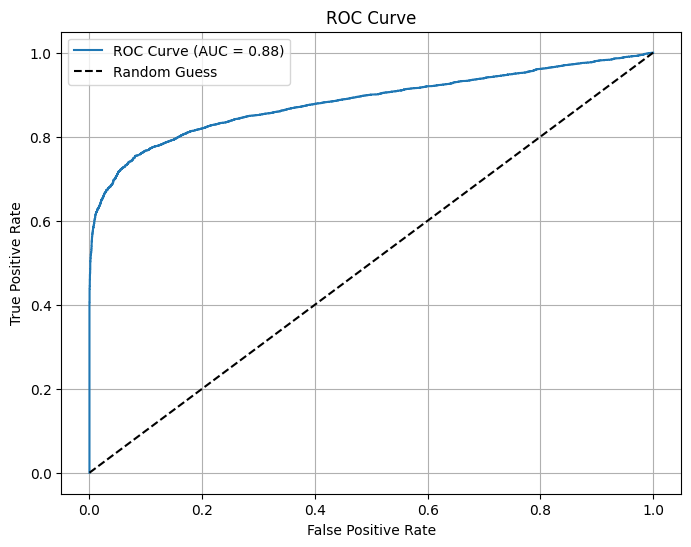

In [ ]:
# Evaluate XGBoost model
xgb_eval = []
for i in range(len(xgb_results)):
  print(f"Evaluating dataset {i+1} for XGBoost")
  xgb_eval.append(evaluation(xgb_results[i][0], xgb_results[i][1], datasets[i][3]))
  if i < len(svm_results) - 1:
      print("---------------------------------------------------------------------------")

In [ ]:
with open('/content/xgb_models/xgb_eval.pkl', 'wb') as f:
    pickle.dump(xgb_eval, f)

| Dataset | Accuracy   | Precision  | Recall     | F1-Score   | ROC-AUC    |
| ------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| 1       | 0.8780     | 0.9765     | 0.8078     | 0.8842     | 0.9033     |
| 2       | 0.8778     | 0.9771     | 0.8071     | 0.8840     | 0.9019     |
| 3       | **0.8838** | **0.9942** | 0.8032     | **0.8885** | 0.9013     |
| 4       | 0.8804     | 0.9835     | 0.8062     | 0.8860     | 0.9016     |
| 5       | 0.8834     | 0.9935     | 0.8030     | 0.8881     | 0.9028     |
| 6       | 0.8784     | 0.9794     | 0.8062     | 0.8844     | **0.9039** |
| 7       | 0.7891     | 0.8184     | **0.8152** | 0.8168     | 0.8708     |
| 8       | 0.8165     | 0.8648     | 0.8080     | 0.8354     | 0.8828     |


# Discussion

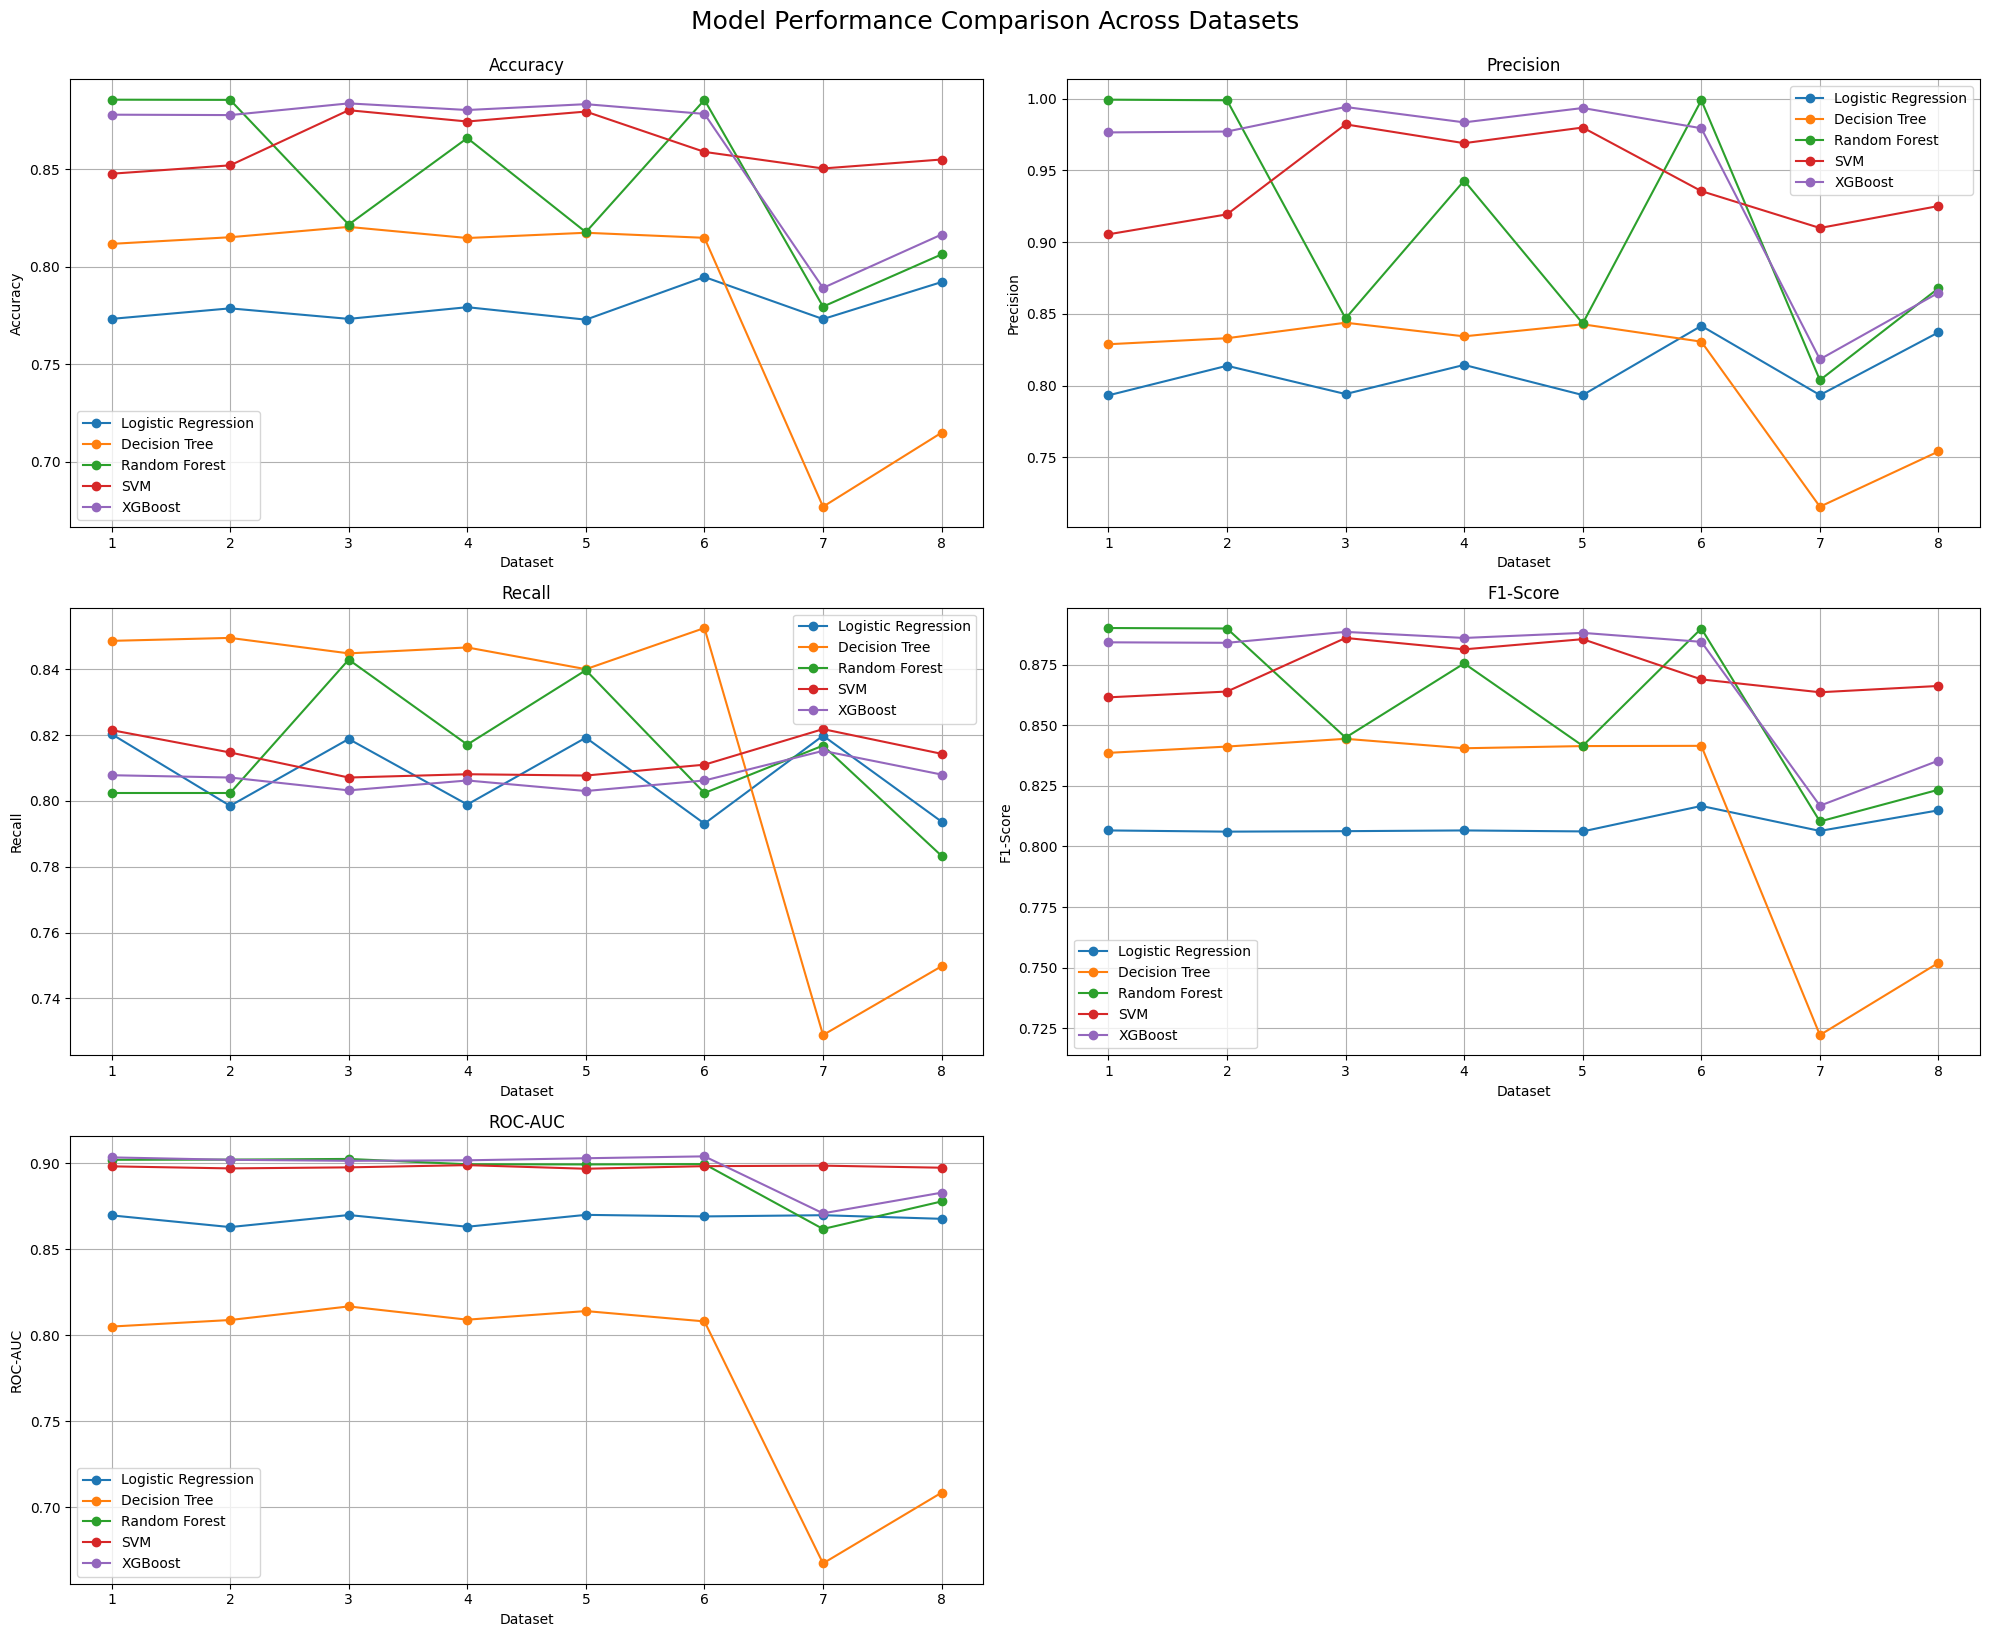

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and evaluations
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost']
evals = [logistic_eval, dt_eval, rf_eval, svm_eval, xgb_eval]

# Number of datasets
n_datasets = len(logistic_eval)

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
n_metrics = len(metrics)

# Transpose the evaluation results to get metrics per model
# Shape after: eval_matrix[metric][model][dataset]
eval_matrix = [[[model_eval[i][m] for i in range(n_datasets)] for model_eval in evals] for m in range(n_metrics)]

# Plotting
plt.figure(figsize=(20, 16))
for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i + 1)
    for j, model in enumerate(models):
        plt.plot(range(1, n_datasets + 1), eval_matrix[i][j], marker='o', label=model)
    plt.title(metric)
    plt.xlabel("Dataset")
    plt.ylabel(metric)
    plt.xticks(range(1, n_datasets + 1))
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.suptitle("Model Performance Comparison Across Datasets", fontsize=18, y=1.02)
plt.show()


# Best Model Enhancement: using GridSearchCV

Since XGBoost’s recall on Dataset 3 is still not as high as we want for this task, we plan to use GridSearchCV to tune the model’s hyperparameters. This will help us find the best settings that improve recall while also keeping a good balance with other important metrics like precision, F1-score, and ROC-AUC. By doing this, we aim to make the model better at correctly identifying individuals who are likely to change occupations, making our early warning system more effective and reliable.

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search_model(model, param_grid, X_train, y_train, scoring='recall', cv=5, verbose=1):
    """
    Performs GridSearchCV on any scikit-learn compatible model.

    Parameters:
    - model: the ML model (e.g., RandomForestClassifier())
    - param_grid: dictionary of hyperparameters to search
    - X_train: training features
    - y_train: training labels
    - scoring: evaluation metric (default: 'accuracy')
    - cv: number of cross-validation folds (default: 5)
    - verbose: verbosity level

    Returns:
    - best_model: trained model with best parameters
    - best_params: dictionary of best parameters
    """
    grid = GridSearchCV(estimator=model, param_grid=param_grid,
                        scoring=scoring, cv=cv, verbose=verbose, n_jobs=-1)
    grid.fit(X_train, y_train)

    print("Best Parameters:", grid.best_params_)
    print("Best Score:", grid.best_score_)

    return grid.best_estimator_, grid.best_params_

In [ ]:
# Define best performing model so far and its hyperparameter grid
param_grid = {'max_depth': [3, 5, 7, 9, 11, 15], 'learning_rate': [0.01, 0.1, 0.3], 'n_estimators': [50, 100, 200, 300, 500], 'random_state': [42]}
best_model, best_params = grid_search_model(XGBClassifier(), param_grid, d3_x_train, d3_y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 500, 'random_state': 42}
Best Score: 0.8130196583951014


In [ ]:
with open('/content/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Accuracy: 0.8677
Precision: 0.9495
Recall: 0.8138
F1-Score: 0.8764
ROC-AUC: 0.9009


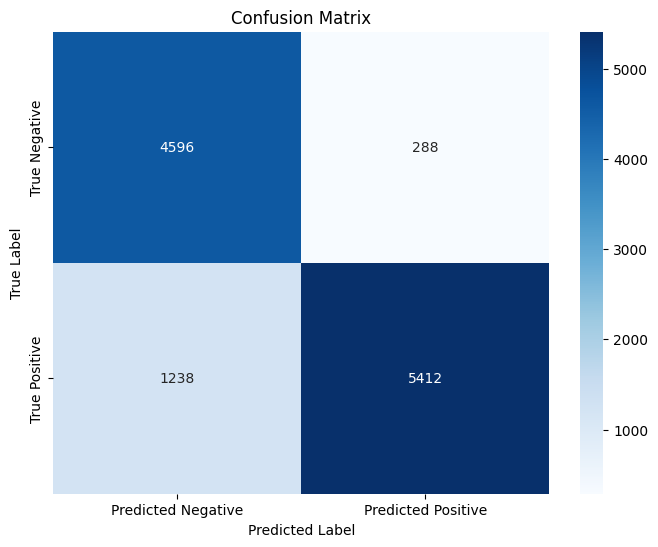

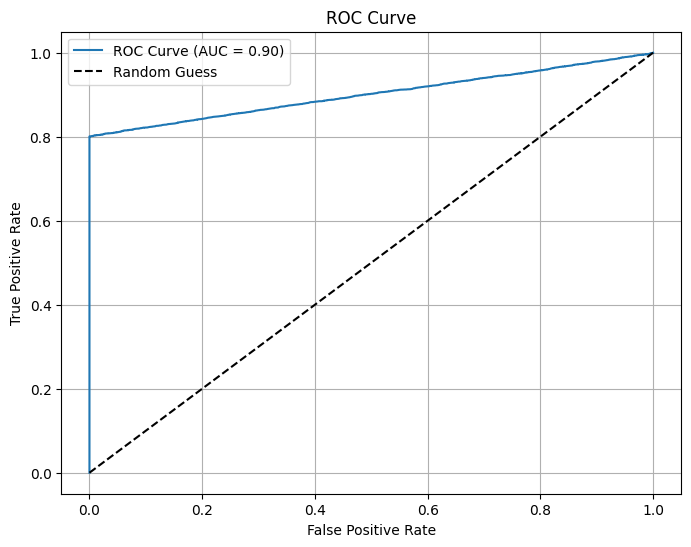

In [ ]:
best_pred = best_model.predict(d3_x_test)
best_prob = best_model.predi  ct_proba(d3_x_test)[:, -1]
best_accuracy, best_precision, best_recall, best_f1, best_roc = evaluation(best_pred, best_prob, d3_y_test)

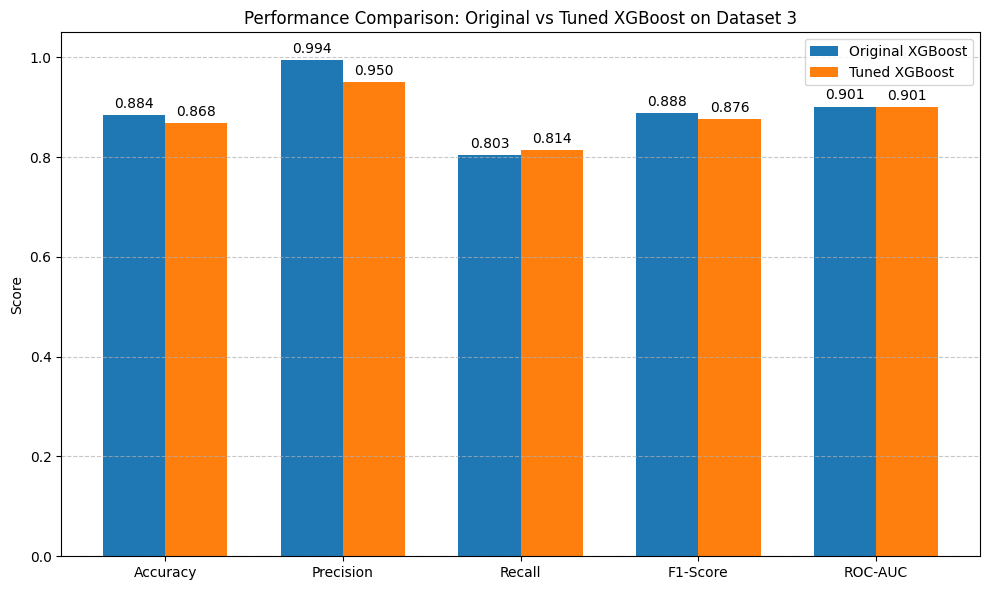

In [ ]:
# Metric names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Original XGBoost metrics for Dataset 3
orig_metrics = xgb_eval[2]
# Tuned model metrics
tuned_metrics = [best_accuracy, best_precision, best_recall, best_f1, best_roc]

# Positions for bars
x = np.arange(len(metric_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars1 = ax.bar(x - width/2, orig_metrics, width, label='Original XGBoost')
bars2 = ax.bar(x + width/2, tuned_metrics, width, label='Tuned XGBoost')

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Performance Comparison: Original vs Tuned XGBoost on Dataset 3')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.set_ylim(0, 1.05)
ax.legend()

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Deployment

https://wqd7007-ml-group-assignment-e3pbxov5yehnhiqtlxr4q4.streamlit.app/